## Homework #4. Exploratory Data Analysis
#### Author: `<Morhun> <Anton>`
#### Total time spent on h/w (in minutes): `3820`

In [1]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from collections import Counter
import re
import networkx as nx
import seaborn as sns
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [2]:
dtype_dict = {
    'Unnamed: 0': 'int32', 
    'id': 'str', 
    'date': 'str', 
    'views': 'float32', 
    'reactions': 'str', 
    'to_id': 'str', 
    'fwd_from': 'str', 
    'message': 'str', 
    'type': 'category', 
    'duration': 'float32', 
    'dialog_id': 'str', 
    'frw_from_title': 'str', 
    'frw_from_name': 'str', 
    'msg_entity': 'str'
}

chunk_size = 10000 
chunks = pd.read_csv('D:\Anton\data-analysis\merged_data\data.csv', chunksize=chunk_size, dtype=dtype_dict)
df = pd.concat(chunks, ignore_index=True)
print(df.head())

   Unnamed: 0        id                       date     views reactions  \
0           0  189123.0  2022-12-19 09:56:04+00:00   98413.0       NaN   
1           1  189122.0  2022-12-19 09:51:57+00:00  120179.0       NaN   
2           2  189121.0  2022-12-19 09:51:57+00:00  116172.0       NaN   
3           3  189120.0  2022-12-19 09:51:57+00:00  115171.0       NaN   
4           4  189119.0  2022-12-19 09:51:57+00:00  118174.0       NaN   

                                to_id fwd_from  \
0  PeerChannel(channel_id=1101170442)      NaN   
1  PeerChannel(channel_id=1101170442)      NaN   
2  PeerChannel(channel_id=1101170442)      NaN   
3  PeerChannel(channel_id=1101170442)      NaN   
4  PeerChannel(channel_id=1101170442)      NaN   

                                             message   type  duration  ...  \
0  ФТС России ожидает роста товарооборота с Китае...   text       NaN  ...   
1                                                NaN  photo       NaN  ...   
2                   

## To begin with, the following questions came to my mind, the answer to which can be found in the data and some of them can be tried to be visualized using graphs
### 1. Min and max value of views
### 2. Date of the first and last message from whole channels
### 3. The ratio of the number of different types of content
### 4. Distribution of messages by type over time
### 5. What time is the most involved in the form of views?
### 6. Dynamics of daily views
### 7. Find the most popular message
### 8. Find the longest message
### 9. What days of the week are the most popular for posting?
### 10. Comparison of two words frequency in messages
### 11. What percentage of posts refer to the war in Ukraine?
### 12. Find top 150 channels whose share of the content is devoted to the topics of the war in Ukraine
  #### 12.1 Phrases that is most often found in the TOP5 channels with military and non-military themes 
  #### 12.2 Top 10 words for channels with the highest and lowest percentage of military topics 
  #### 12.3 Number of war-related words for the channel with the highest and lowest percentage of military topics
### 13. What channels are connected? (contain copied posts)
### 14. What percentage of the topics from the Top 100 posts that caused the most engagement are devoted to the topics of the war in Ukraine?
### 15. What are the dynamics of views for certain pairs keywords?
  #### 15.1. Dynamics of views for presidents of 2 countries
  #### 15.2. Dynamics of views for two different countries
  #### 15.3. Dynamics of views for peace and war
### 16. What is the most popular sensitive topics?
### 17. What is the total number of videos released by russian propaganda channels in the last year?
### 18. How did the start of the war in Ukraine affect the number of views?
### 19. What is the distribution of video views across different days of the week? 
### 20.  What percentage of the posts have reactions?
### 21. What type of messages do people respond best to?
#### 21.1. What type of messages do people respond best to? (counting general amount of reaction for each content type)
#### 21.2. What type of messages do people respond best to? (counting average amount of reaction for each content type)
### 22. Correlation between views and reactions by Hours of the Day before start of war (only for posts which have >=1 reaction)
### 23. Correlation between views and reactions by Hours of the Day after start of war (only for posts which have >=1 reaction)
### 24. Find the month after the start of the war in which the most messages were published 
### 25. Correlation between toxic and neutral messages by month. Comparing before and after war (starting from 2020)
### 26. Correlation between views for toxic and neutral messages by month. Comparing before and after war (starting from 2020)
### 27. 3D visualization of the dependence of the number of views on the neutrality of the messages over time in March before and after the war.
### 28. How popular the topic of the coronavirus was in these channels after begining of pandemia and how the begining of the war in Ukraine affected the dynamics of topics about it.

## 1. min and max values of views

In [3]:
print("The least number of views per message:", min(df["views"]))
print("The highest number of views per message:", max(df["views"]))

The least number of views per message: 1.0
The highest number of views per message: 10318833.0


## 2. Date of the first and last message from whole channels

In [101]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df_cleaned = df.dropna(subset=['date', 'message'])
first_message = df_cleaned.loc[df_cleaned['date'].idxmin()]
last_message = df_cleaned.loc[df_cleaned['date'].idxmax()]
print("Найперше повідомлення:")
print(f"Channel: {first_message['channel']}, Date: {first_message['date']}, Message: {first_message['message']}")

print("\nНайостанніше повідомлення:")
print(f"Channel: {last_message['channel']}, Date: {last_message['date']}, Message: {last_message['message']}")

Найперше повідомлення:
Channel: varlamov, Date: 2015-09-22 16:12:02, Message: 😛

Найостанніше повідомлення:
Channel: voenkorKotenok, Date: 2022-12-26 10:59:50, Message: ВС РФ в районе Краматорска уничтожили пункт ремонта вооружения ВСУ. В момент удара на нём на находились две машины РСЗО HIMARS, две "Гвоздики" и пять гаубиц Д-30. 

Также был нанесён удар по командному пункту 80-й десантно-штурмовой бригады вооружённых сил Украины. 

@epoddubny


## 3. The ratio of the number of different types of content

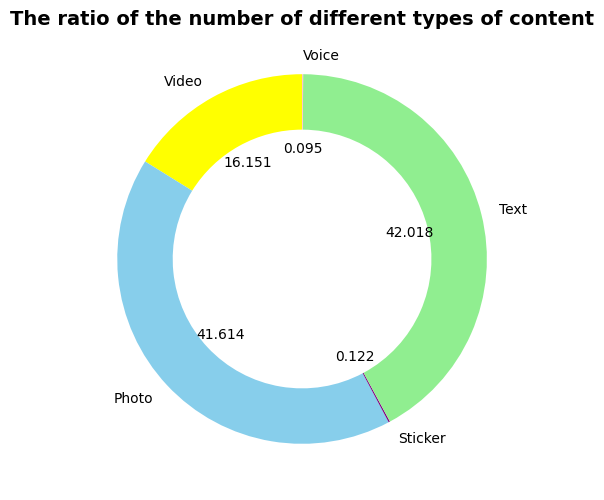

In [16]:
video_count = (df['type'] == 'video').sum()
photo_count = (df['type'] == 'photo').sum()
text_count = (df['type'] == 'text').sum()
voice_count = (df['type'] == 'voice').sum()
sticker_count = (df['type'] == 'sticker').sum()
plt.figure(figsize=(6, 6))
diagram = pd.Series({"Video":video_count, "Photo":photo_count, "Sticker":sticker_count, "Text":text_count, "Voice":voice_count})
plt.pie(diagram, labels=diagram.index, autopct='%.3f', startangle=90, colors=['yellow', 'skyblue', 'purple', 'lightgreen', 'pink'], wedgeprops={'width': 0.3})
plt.text(0, 1.3, 'The ratio of the number of different types of content', horizontalalignment='center', verticalalignment='center', fontsize=14, fontweight='bold', color='black')
plt.show()

## 4. Distribution of messages by type over time

<Figure size 1400x700 with 0 Axes>

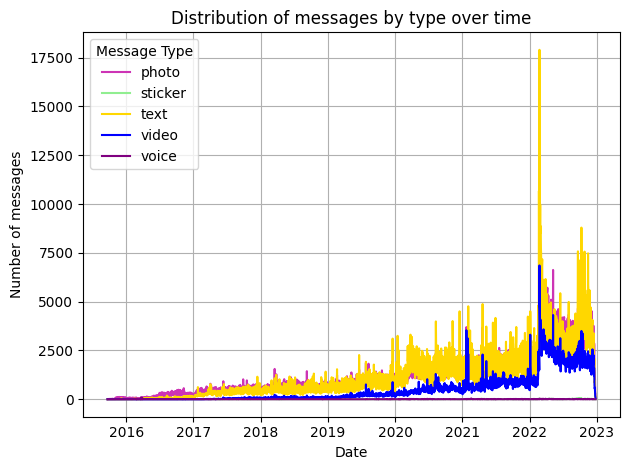

In [70]:
plt.figure(figsize=(14, 7))
messages_per_day.plot(kind='line', color=['#cd34b5', 'lightgreen', '#ffd700', '#0000ff', 'purple'])
plt.title('Distribution of messages by type over time')
plt.xlabel('Date')
plt.ylabel('Number of messages')
plt.legend(title='Message Type')
plt.grid()
plt.tight_layout()
plt.show()

## 5. What time is the most involved in the form of views?

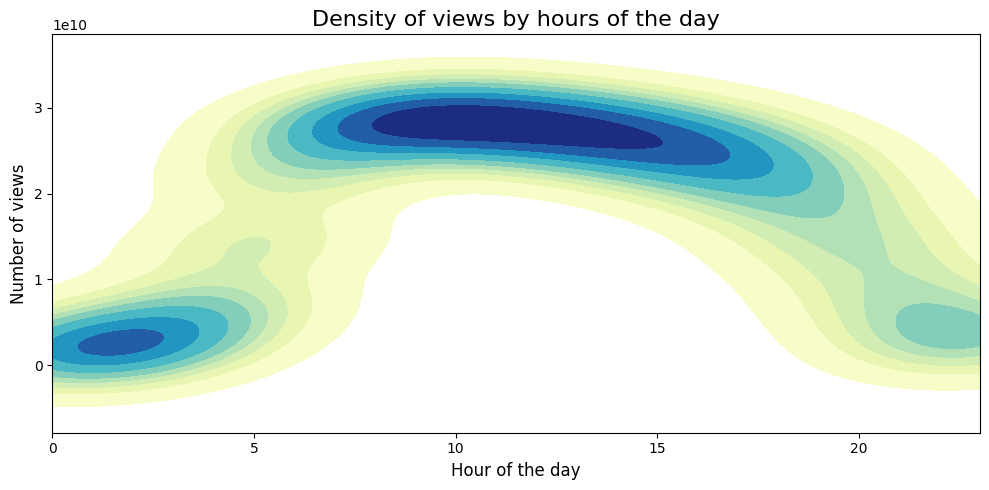

In [17]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['hour'] = df['date'].dt.hour
hourly_views = df.groupby('hour')['views'].sum()
plt.figure(figsize=(10, 5))
sns.kdeplot(x=hourly_views.index, y=hourly_views.values, cmap='YlGnBu', fill=True, bw_adjust=0.5)
plt.title('Density of views by hours of the day', fontsize=16)
plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Number of views', fontsize=12)
plt.xlim(0, 23)
plt.tight_layout()
plt.show()

### 5.1 At what time are the most posts published?

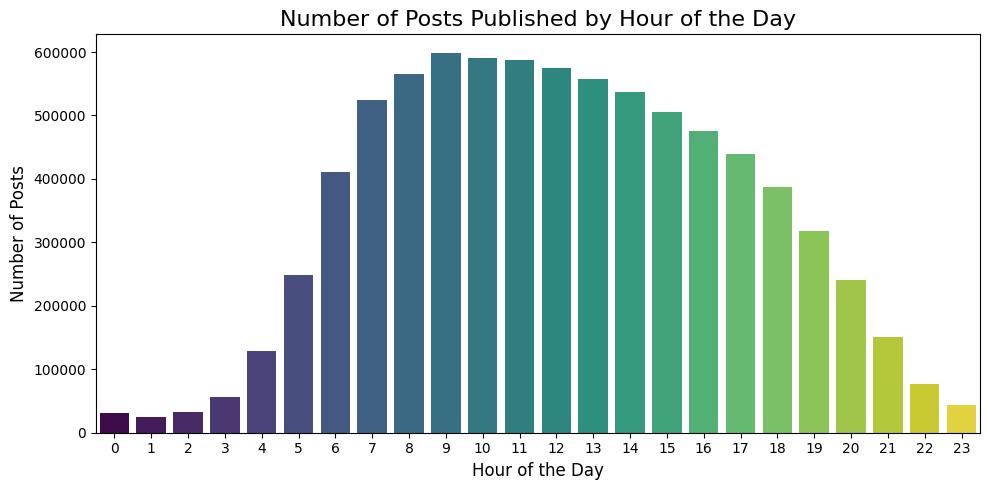

In [9]:
def plot_posts_by_hour(df, date_column='date'):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    df['hour'] = df[date_column].dt.hour
    hourly_posts = df['hour'].value_counts().sort_index()
    hourly_posts_df = hourly_posts.reset_index()
    hourly_posts_df.columns = ['hour', 'count']

    plt.figure(figsize=(10, 5))
    sns.barplot(data=hourly_posts_df, x='hour', y='count', hue='hour', dodge=False, palette='viridis', legend=False)
    plt.title('Number of Posts Published by Hour of the Day', fontsize=16)
    plt.xlabel('Hour of the Day', fontsize=12)
    plt.ylabel('Number of Posts', fontsize=12)
    plt.xticks(range(24))
    plt.tight_layout()
    plt.show()

plot_posts_by_hour(df, date_column='date')

### 5.2 Correlation between views and posts

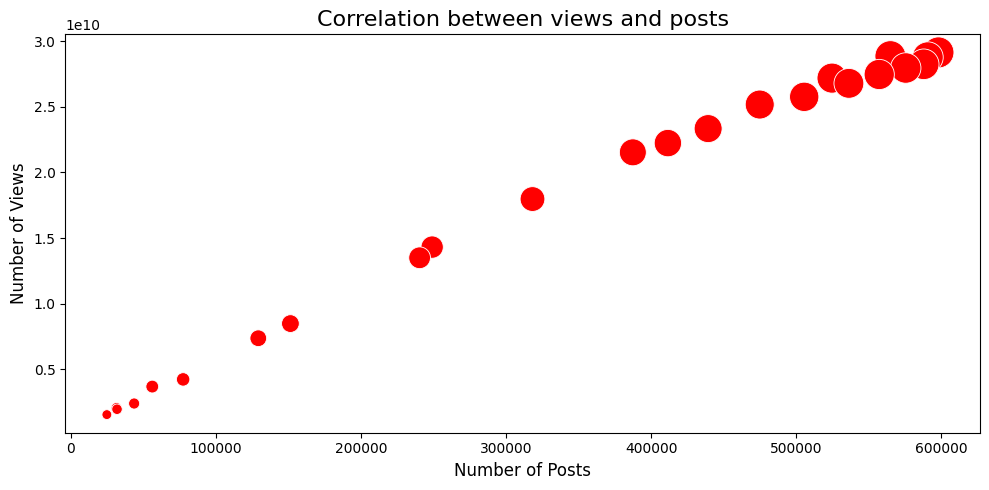

In [54]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['hour'] = df['date'].dt.hour
hourly_views = df.groupby('hour')['views'].sum()
hourly_posts = df['hour'].value_counts().sort_index()
hourly_data = pd.DataFrame({
    'views': hourly_views,
    'posts': hourly_posts
}).fillna(0) 

correlation = hourly_data['views'].corr(hourly_data['posts'])

plt.figure(figsize=(10, 5))
sns.scatterplot(x=hourly_data['posts'], y=hourly_data['views'], color='r', marker='o', 
                size=hourly_data['views'], sizes=(50, 500), legend=False)
plt.title('Correlation between views and posts', fontsize=16)
plt.xlabel('Number of Posts', fontsize=12)
plt.ylabel('Number of Views', fontsize=12)
plt.tight_layout()
plt.show()

#### As it turned out, most messages are published at 9 o'clock, and in general, the peak of active publication is from 8 am. to 13 pm. 
#### And the most views are in the period from 8 am. to 15 pm.

## 6. Dynamics of daily views

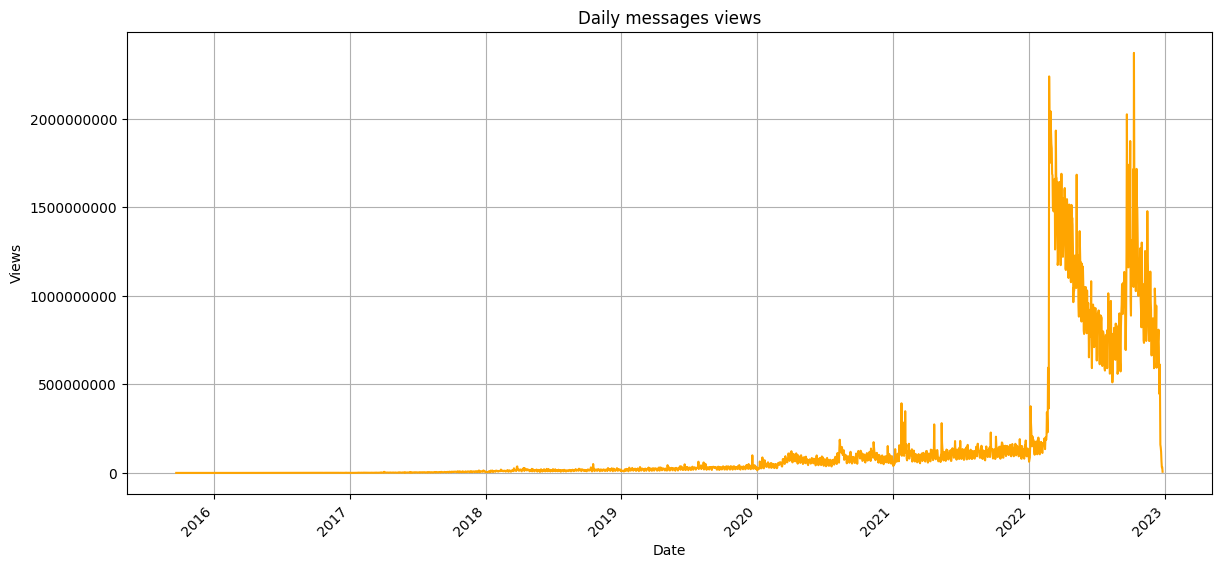

In [55]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
daily_views = (df.groupby(df['date'].dt.date)['views'].sum())
plt.figure(figsize=(14, 6))
daily_views.plot(kind='line', color='orange')
plt.title('Daily messages views')
plt.xlabel('Date')
plt.ylabel('Views')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

## 7. Find the most popular message

In [7]:
max_views_index = df['views'].idxmax()

most_popular_message = df.loc[max_views_index, "message"]

print(f"The most popular message is\n{most_popular_message}")


The most popular message is
«Мы встретим рассвет» — новый клип в поддержку наших защитников.

Знаем, как сейчас тяжело нашим ребятам, которые каждый день и ночь проявляют невероятную стойкость, мужество и крепость духа. 
Вы - воины чести и правды. Такими вас знают, боятся и ценят. 

Мы с вами, ребята! И мы обязательно вместе встретим рассвет на РОДНОЙ ЗЕМЛЕ!

Архангел Спецназа. Подписаться.


## 8. Find the longest message

In [19]:
text_messages = df[df['type'] == 'text']
max_text_index = text_messages['message'].str.len().idxmax()
longest_text_message = text_messages.loc[max_text_index, 'message']
print(f"The longest text message is:\n{longest_text_message}")


The longest text message is:
Главный редактор ИА Regnum, писатель, журналист, член СПЧ Марина Ахмедова @Marinaslovo

Вчера на встрече СПЧ с президентом наш член Маковецкая сложно и монотонно говорила о важном — о работе российских НКО. Президент внимательно слушал, поигрывая большой скрепкой на столе. «Цык-цык, — издавала звук скрепка, — цык-цык». И голос нашего члена, и звук скрепки вводили в умиротворённое состояние. И вдруг член извинилась, сказав, что не может не спросить про ядерную войну, угроза которой волнует значительное количество людей.

Путин перестал щёлкать скрепкой.

— Сто раз же уже говорили, что Россия не собирается, — пробурчала я в сторону члена совета Ашманова, сидевшего со мной рядом. Имела я в виду Лаврова и Пескова, а также то, как иностранные «свободные» СМИ постоянно раскручивают ядерную истерию и России приходится периодически повторять: «Мы не планируем…» Но тут я поняла, что у Путина просят всего лишь выступить в очередной раз психотерапевтом для всего мира 

## 9. What days of the week are the most popular for posting

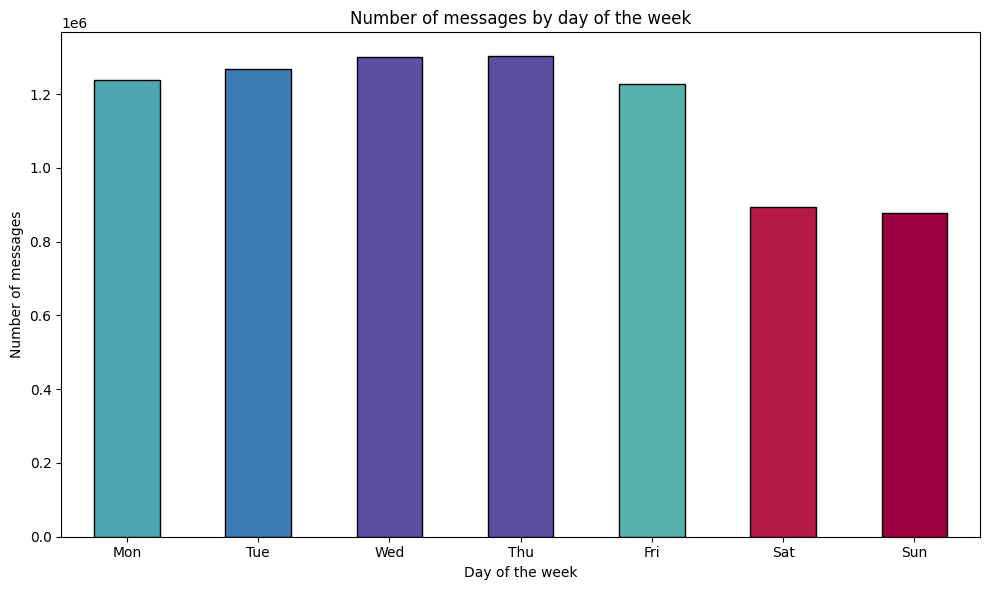

In [61]:
def plot_message_counts_by_weekday(df, date_column='date'):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    df['weekday'] = df[date_column].dt.dayofweek
    weekday_counts = df['weekday'].value_counts().sort_index()
    days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    norm = plt.Normalize(weekday_counts.min(), weekday_counts.max())
    cmap = plt.colormaps['Spectral']
    colors = [cmap(norm(count)) for count in weekday_counts]
    
    plt.figure(figsize=(10, 6))
    ax = weekday_counts.plot(kind='bar', color=colors, edgecolor='black')
    ax.set_title('Number of messages by day of the week')
    ax.set_xlabel('Day of the week')
    ax.set_ylabel('Number of messages')
    ax.set_xticklabels(days_of_week, rotation=0, ha="center")
    plt.tight_layout()
    plt.show()

plot_message_counts_by_weekday(df, date_column='date')

## 10. Comparison of two words frequency in messages

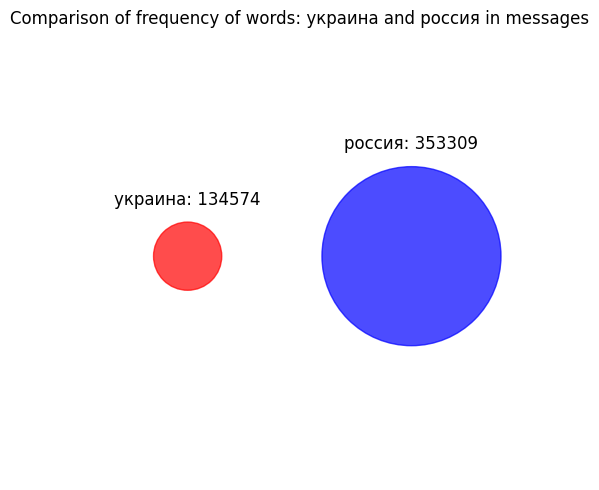

In [11]:
def count_words_in_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    words = text.split()
    return words

def plot_word_comparison(df, word1, word2, text_column='message', chunk_size=10000):
    word_counts = Counter()
    for start in range(0, len(df), chunk_size):
        chunk = df.iloc[start:start+chunk_size]
        chunk_words = count_words_in_text(' '.join(chunk[text_column].dropna()))
        word_counts.update(chunk_words)

    count_word1 = word_counts.get(word1.lower(), 0)
    count_word2 = word_counts.get(word2.lower(), 0)
    max_count = max(count_word1, count_word2)

    fig, ax = plt.subplots(figsize=(10, 5))
    radius_word1 = count_word1 / max_count * 0.4
    radius_word2 = count_word2 / max_count * 0.4

    circle1 = plt.Circle((-0.5, 0), radius_word1, color='red', alpha=0.7)
    ax.add_patch(circle1)
    circle2 = plt.Circle((0.5, 0), radius_word2, color='blue', alpha=0.7)
    ax.add_patch(circle2)
    ax.text(-0.5, radius_word1 + 0.1, f'{word1}: {count_word1}', ha='center', va='center', fontsize=12, color='black')
    ax.text(0.5, radius_word2 + 0.1, f'{word2}: {count_word2}', ha='center', va='center', fontsize=12, color='black')

    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal', 'box')
    ax.set_title(f'Comparison of frequency of words: {word1} and {word2} in messages')
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
plot_word_comparison(df, 'украина', 'россия', text_column='message')

#### I tried to find words before and after what I was looking for, but I got either short words that did not carry any information (for example, "что"), or I got phrases that did not logically relate to the words I was looking for. I'll try to figure out this feature before the presentation.

## 11. What percentage of posts refer to the war in Ukraine?

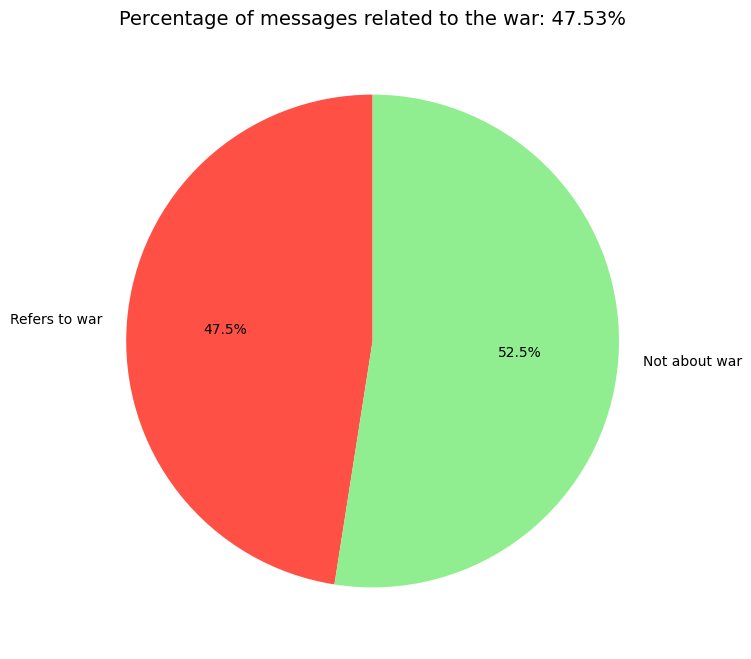

In [59]:
war_keywords = ['всу', 'вс рф', 'войн', 'сво', 'мобилиз', 'конфликт', 'боевы', 'вторж', 'зеленск', 'нато', 'отступ', 
                    'погиб', 'украин', 'окуп', 'агрес', 'армия', 'санкци', 'тревога', 'плен', 'жертв', 'танк', 'ракет', 
                    'авиа', 'разру', 'дрон', 'беспил', 'спецоперац', 'потер', 'фронт', 'тер', 'взрыв', 'вое', 'призыв', 
                    'вооруж', 'оруж', 'уничто']

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text

def is_war_related(text, war_keywords):
    text = clean_text(text)
    return any(re.search(rf'\b{keyword}', text) for keyword in war_keywords)

def plot_war_percentage(df, text_column='message', date_column='date'):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce').dt.tz_localize(None)
    df_filtered = df[df[date_column] > pd.to_datetime('2022-02-24').tz_localize(None)].copy()
    df_filtered.loc[:, 'is_war_related'] = df_filtered[text_column].apply(
        lambda x: is_war_related(str(x), war_keywords) if pd.notnull(x) else False
    )
    war_count = df_filtered['is_war_related'].sum()
    total_count = len(df_filtered)
    war_percentage = (war_count / total_count) * 100

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie([war_count, total_count - war_count], labels=['Refers to war', 'Not about war'], autopct='%1.1f%%', startangle=90, colors=['#Ff5045', 'lightgreen'])
    ax.set_title(f'Percentage of messages related to the war: {war_percentage:.2f}%', fontsize=14)
    plt.show()

plot_war_percentage(df, text_column='message', date_column='date')

## 12. Find top 150 channels whose share of the content is devoted to the topics of the war in Ukraine

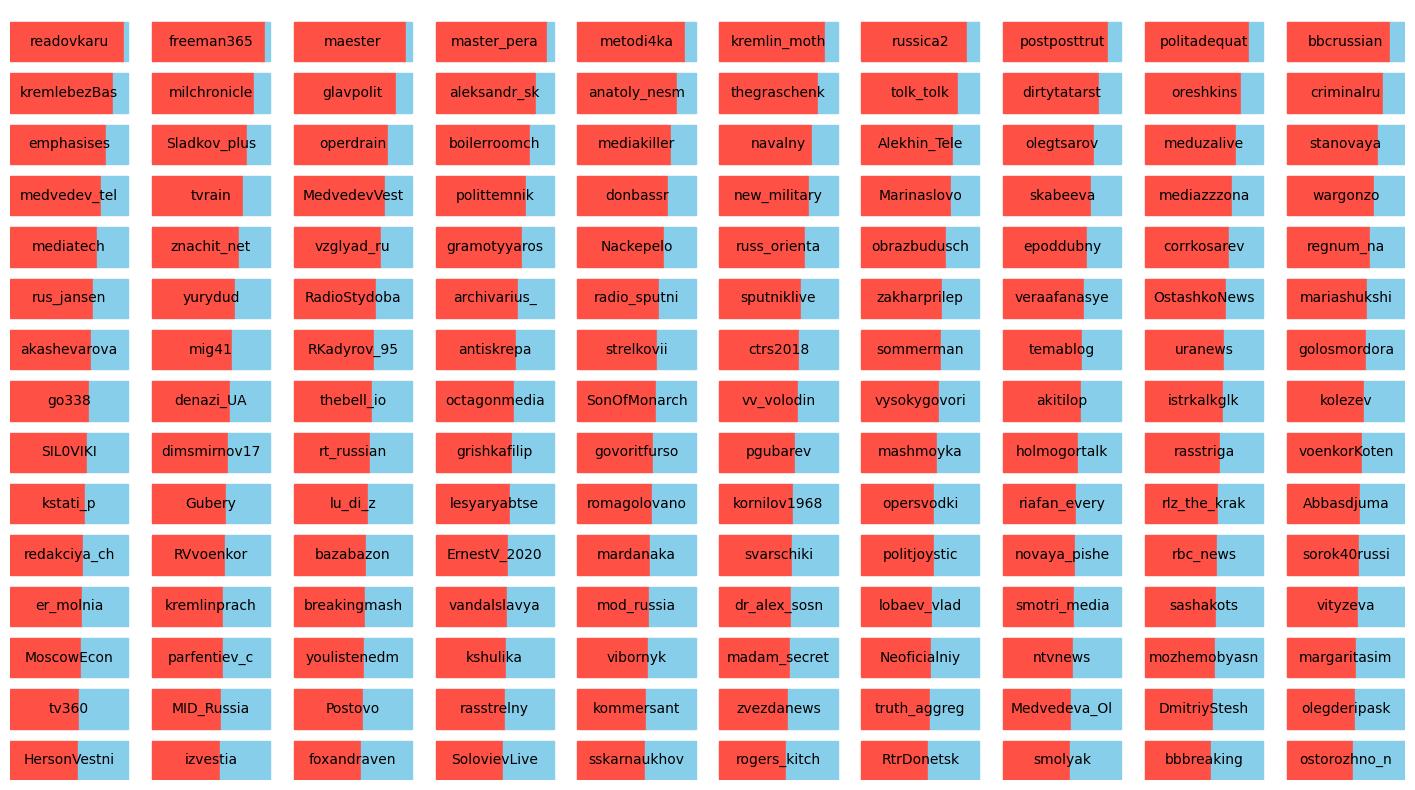

In [57]:
war_keywords = ['всу', 'вс', 'войн', 'сво', 'мобилиз', 'конфликт', 'боевы', 'вторж', 'зеленск', 'нато', 'отступ', 
                    'погиб', 'украин', 'окуп', 'агрес', 'армия', 'санкци', 'тревога', 'плен', 'жертв', 'танк', 'ракет', 
                    'авиа', 'разру', 'дрон', 'беспил', 'спецоперац', 'потер', 'фронт', 'тер', 'взрыв', 'вое', 'призыв', 
                    'вооруж', 'оруж', 'уничто']

def calculate_war_percentage_by_channel(df, text_column='message', date_column='date', channel_column='channel'):
    
    def is_war_related(text, war_keywords):
        text = re.sub(r'[^\w\s]', '', text.lower())
        return any(re.search(rf'\b{keyword}', text) for keyword in war_keywords)
    
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce').dt.tz_localize(None)
    df_filtered = df[df[date_column] > pd.to_datetime('2022-02-24').tz_localize(None)].copy()
    df_filtered['is_war_related'] = df_filtered[text_column].apply(
        lambda x: is_war_related(str(x), war_keywords) if pd.notnull(x) else False
    )

    war_percentage_df = df_filtered.groupby(channel_column).agg(
        war_count=('is_war_related', 'sum'),
        total_count=('is_war_related', 'size')
    )
    war_percentage_df['war_percentage'] = (war_percentage_df['war_count'] / war_percentage_df['total_count']) * 100
    war_percentage_df = war_percentage_df.reset_index()
    return war_percentage_df

war_percentage_df = calculate_war_percentage_by_channel(df, text_column='message', date_column='date', channel_column='channel')

def plot_channel_war_percentage_custom_with_spacing(war_percentage_df, channel_column='channel', percentage_column='war_percentage', row_spacing=0.5, col_spacing=0.2):
    war_percentage_df = war_percentage_df.sort_values(by=percentage_column, ascending=False)
    
    channels = war_percentage_df[channel_column].tolist()[:150]
    war_percentages = war_percentage_df[percentage_column].tolist()[:150]
    
    grid_size = (15, 10) 
    total_cells = grid_size[0] * grid_size[1]
    
    fig, ax = plt.subplots(figsize=(18, 10))
    ax.axis('off')

    for idx, (channel, percentage) in enumerate(zip(channels, war_percentages)):
        if idx >= total_cells:
            break
        row, col = divmod(idx, grid_size[1])
        x = col + col * col_spacing 
        y = (grid_size[0] - row - 1) * (1 + row_spacing) 
        red_height = percentage / 100
        green_height = 1 - red_height

        ax.add_patch(plt.Rectangle((x, y), red_height, 1, color="#Ff5045"))
        ax.add_patch(plt.Rectangle((x + red_height, y), green_height, 1, color="skyblue"))
        ax.text(x +0.5, y + 0.5, channel[:12],
                color='black', ha='center', va='center', fontsize=10)

    total_width = grid_size[1] + (grid_size[1] - 1) * col_spacing
    total_height = grid_size[0] * (1 + row_spacing)
    ax.set_xlim(0, total_width)
    ax.set_ylim(0, total_height)
    plt.show()

plot_channel_war_percentage_custom_with_spacing(war_percentage_df, 'channel', 'war_percentage', row_spacing=0.3, col_spacing=0.2)

#### 12.1 Phrases that is most often found in the TOP5 channels with military and non-military themes 

In [63]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stop_words = set(ENGLISH_STOP_WORDS).union({'даже','он', 'его', 'может', 'вот', 'или', 'будет', 'тебя', 'если', 'их', 'же', 'до', 'ты', 'так', 'все', 'от', 'но', 'как', 'для', 'по', 'это', 'что', 'том', 'при', 'на', 'не', 'только', 'этим', 'и', 'то', 'уже', 'мы', 'из', 'за','https'})

def filter_phrases(phrases, stop_words):
    filtered_phrases = [
        (phrase, count) for phrase, count in phrases
        if not any(word in stop_words for word in phrase.split())
    ]
    return filtered_phrases

def get_top_phrases(df, channel, text_column='message', top_n=5):
    channel_messages = df[df['channel'] == channel][text_column].dropna().astype(str)
    
    vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=5000)
    X = vectorizer.fit_transform(channel_messages)
    ngrams = vectorizer.get_feature_names_out()
    counts = X.sum(axis=0).A1
    ngram_counts = Counter(dict(zip(ngrams, counts)))
    
    top_phrases = ngram_counts.most_common(top_n)
    return top_phrases

def get_top_phrases_for_channels(df, channels, text_column='message', stop_words=None, top_n=5):
    result = {}
    for channel in channels:
        top_phrases = get_top_phrases(df, channel, text_column=text_column, top_n=20)
        filtered_phrases = filter_phrases(top_phrases, stop_words)
        result[channel] = filtered_phrases[:top_n]
    return result

# Топ 5 каналів із найбільшим і найменшим відсотком воєнної тематики
top_5_max_channels = war_percentage_df.nlargest(5, 'war_percentage')['channel'].tolist()
top_5_min_channels = war_percentage_df.nsmallest(5, 'war_percentage')['channel'].tolist()

# Результати для топ-5
top_phrases_max = get_top_phrases_for_channels(df, top_5_max_channels, text_column='message', stop_words=stop_words, top_n=1)
top_phrases_min = get_top_phrases_for_channels(df, top_5_min_channels, text_column='message', stop_words=stop_words, top_n=1)

# Виведення результатів
print("Топ-5 фраз для каналів із найбільшим відсотком воєнної тематики:")
for channel, phrases in top_phrases_max.items():
    print(f"\nКанал: {channel}")
    print(phrases)

print("\nТоп-5 фраз для каналів із найменшим відсотком воєнної тематики:")
for channel, phrases in top_phrases_min.items():
    print(f"\nКанал: {channel}")
    print(phrases)

Топ-5 фраз для каналів із найбільшим відсотком воєнної тематики:

Канал: readovkaru
[('readovka space', 155)]

Канал: freeman365
[('цель цель', 99)]

Канал: maester
[('со стороны', 346)]

Канал: master_pera
[('мастер пера', 1117)]

Канал: metodi4ka
[('тем более', 430)]

Топ-5 фраз для каналів із найменшим відсотком воєнної тематики:

Канал: leylinurimm
[('yangiyil yangiyil', 80)]

Канал: momdontread
[('мам ну', 43)]

Канал: maxim2004live
[('доброе утро', 37)]

Канал: TheBadComedian
[('youtube com', 22)]

Канал: russianquarantine
[('ss 23', 98)]


#### 12.2 Top 10 words for channels with the highest and lowest percentage of military topics

In [64]:
stop_words = set(ENGLISH_STOP_WORDS).union({'даже','он', 'его', 'может', 'вот', 'или', 'будет', 'тебя', 'если', 'их', 'же', 'до', 'ты', 'так', 'все', 'от', 'но', 'как', 'для', 'по', 'это', 'что', 'том', 'при', 'на', 'не', 'только', 'этим', 'и', 'то', 'уже', 'мы', 'из', 'за', 'https'})

def get_top_words(df, channel, text_column='message', top_n=10, stop_words=None):
    channel_messages = df[df['channel'] == channel][text_column].dropna().astype(str)
    vectorizer = CountVectorizer(ngram_range=(1, 1), max_features=5000, stop_words=list(stop_words))
    X = vectorizer.fit_transform(channel_messages)
    words = vectorizer.get_feature_names_out()
    counts = X.sum(axis=0).A1
    word_counts = Counter(dict(zip(words, counts)))
    return word_counts.most_common(top_n)

def get_top_words_for_channels(df, channels, text_column='message', stop_words=None, top_n=10):
    result = {}
    for channel in channels:
        top_words = get_top_words(df, channel, text_column=text_column, top_n=top_n, stop_words=stop_words)
        result[channel] = top_words
    return result

top_5_max_channels = war_percentage_df.nlargest(5, 'war_percentage')['channel'].tolist()
top_5_min_channels = war_percentage_df.nsmallest(5, 'war_percentage')['channel'].tolist()

top_words_max = get_top_words_for_channels(df, top_5_max_channels, text_column='message', stop_words=stop_words, top_n=10)
top_words_min = get_top_words_for_channels(df, top_5_min_channels, text_column='message', stop_words=stop_words, top_n=10)

print("Топ-10 слів для каналів із найбільшим відсотком воєнної тематики:")
for channel, words in top_words_max.items():
    print(f"\nКанал: {channel}")
    print(words)

print("\nТоп-10 слів для каналів із найменшим відсотком воєнної тематики:")
for channel, words in top_words_min.items():
    print(f"\nКанал: {channel}")
    print(words)

Топ-10 слів для каналів із найбільшим відсотком воєнної тематики:

Канал: readovkaru
[('россии', 1411), ('сша', 939), ('украины', 845), ('сейчас', 836), ('украине', 762), ('всё', 661), ('они', 653), ('есть', 638), ('страны', 624), ('во', 618)]

Канал: freeman365
[('вы', 637), ('всё', 365), ('бы', 240), ('вас', 232), ('нет', 230), ('есть', 225), ('ни', 224), ('просто', 208), ('когда', 200), ('вам', 194)]

Канал: maester
[('россии', 2325), ('однако', 1450), ('бы', 1252), ('еще', 1071), ('сша', 1053), ('этом', 1028), ('чем', 982), ('более', 943), ('во', 938), ('есть', 938)]

Канал: master_pera
[('бы', 6697), ('россии', 5515), ('рф', 4627), ('которые', 4364), ('который', 4354), ('власти', 3916), ('тем', 3786), ('конечно', 3642), ('еще', 3570), ('этом', 3527)]

Канал: metodi4ka
[('россии', 3818), ('бы', 2995), ('было', 2219), ('есть', 2192), ('после', 2143), ('всё', 2079), ('года', 2028), ('можно', 1947), ('когда', 1769), ('во', 1671)]

Топ-10 слів для каналів із найменшим відсотком воєнної

#### 12.3 Number of war-related words for the channel with the highest and lowest percentage of military topics

In [67]:
max_channel_name = list(top_words_max.keys())[0]
min_channel_name = list(top_words_min.keys())[0]

def get_war_related_words_for_single_channel(top_words, war_keywords, channel_name):
    war_related_count = 0
    war_keywords = [keyword.lower() for keyword in war_keywords]

    if channel_name in top_words:
        words = top_words[channel_name]
        for word, count in words:
            word_lower = word.lower()
            if any(keyword in word_lower for keyword in war_keywords):
                war_related_count += count
    return war_related_count

war_words_max_count = get_war_related_words_for_single_channel(top_words_max, war_keywords, max_channel_name)
war_words_min_count = get_war_related_words_for_single_channel(top_words_min, war_keywords, min_channel_name)
print(f"Кількість слів, пов'язаних із війною, для каналу з найбільшим відсотком воєнної тематики ('{max_channel_name}'): {war_words_max_count}")
print(f"Кількість слів, пов'язаних із війною, для каналу з найменшим відсотком воєнної тематики ('{min_channel_name}'): {war_words_min_count}")

Кількість слів, пов'язаних із війною, для каналу з найбільшим відсотком воєнної тематики ('readovkaru'): 2268
Кількість слів, пов'язаних із війною, для каналу з найменшим відсотком воєнної тематики ('leylinurimm'): 0


## 13. What channels are connected? (contain copied posts)

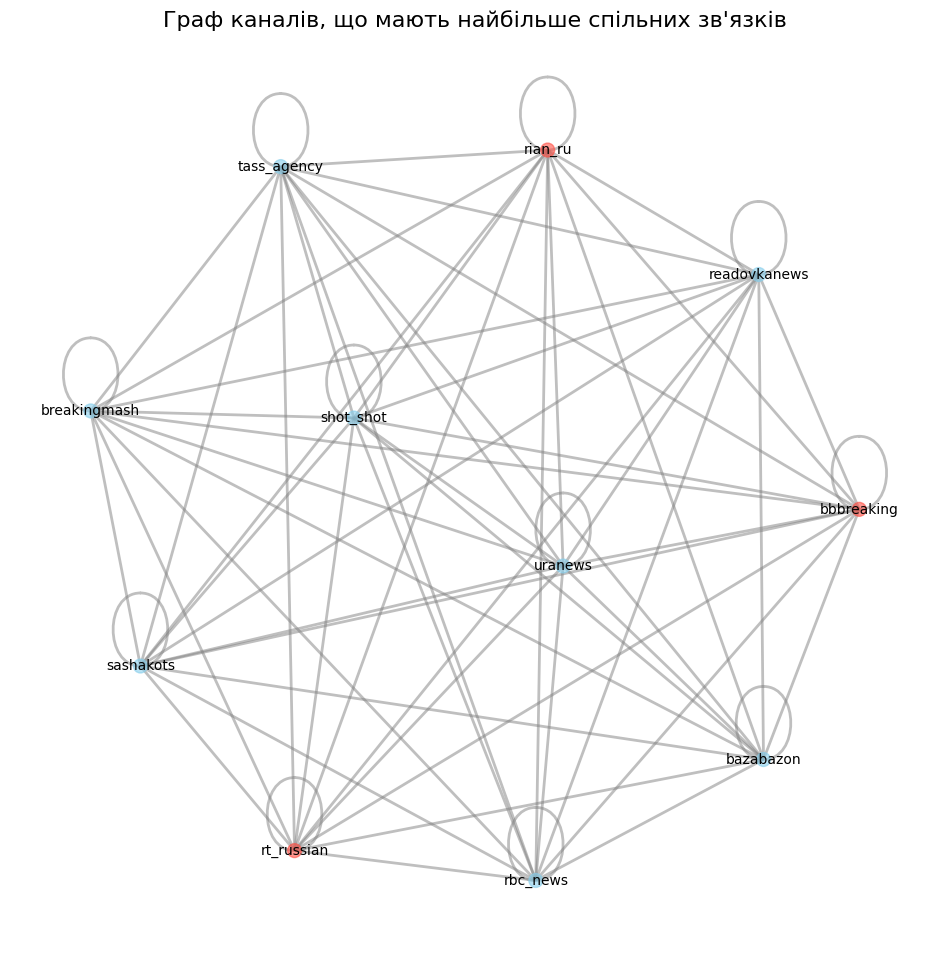

In [3]:
def build_graph_from_shared_posts_optimized(df, threshold=1):
    G = nx.Graph()
    #складність алгоритму зростає експоненційно, тому, щоб не чекати декілька днів для виконання лише цієї функції я взяв ліміт в 1 млн повідомлень
    df = df.head(1000000)
    messages_dict = {}
    for idx, row in df.iterrows():
        message = row['message']
        channel = row['channel']
        
        if message not in messages_dict:
            messages_dict[message] = []
        messages_dict[message].append(channel)

    for message, channels in messages_dict.items():
        if len(channels) > 1: 
            for i in range(len(channels)):
                for j in range(i + 1, len(channels)):
                    G.add_edge(channels[i], channels[j])

    G.remove_nodes_from(list(nx.isolates(G)))
    return G

def plot_channel_graph_optimized(df):
    G = build_graph_from_shared_posts_optimized(df)

    node_degrees = dict(G.degree())
    sorted_nodes = sorted(node_degrees, key=node_degrees.get, reverse=True)
    top_3_channels = sorted_nodes[:3]

    pos = nx.spring_layout(G, k=0.5, seed=42)

    plt.figure(figsize=(12, 12))
    node_colors = ['#Ff5045' if node in top_3_channels else 'skyblue' for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=100, node_color=node_colors, alpha=0.6)
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
    plt.title("Граф каналів, що мають найбільше спільних зв'язків", fontsize=16)
    plt.axis('off')
    plt.show()

plot_channel_graph_optimized(df)

#### Thus, these 3 channels: "rt_russian", "bbbreaking" and "rian_ru" are more likely than others to publish similar messages, which may mean that they have 1 of the same customer or creator and can be used for sharing propaganda

## 14. What percentage of the topics from the Top 100 posts that caused the most engagement are devoted to the topics of the war in Ukraine?

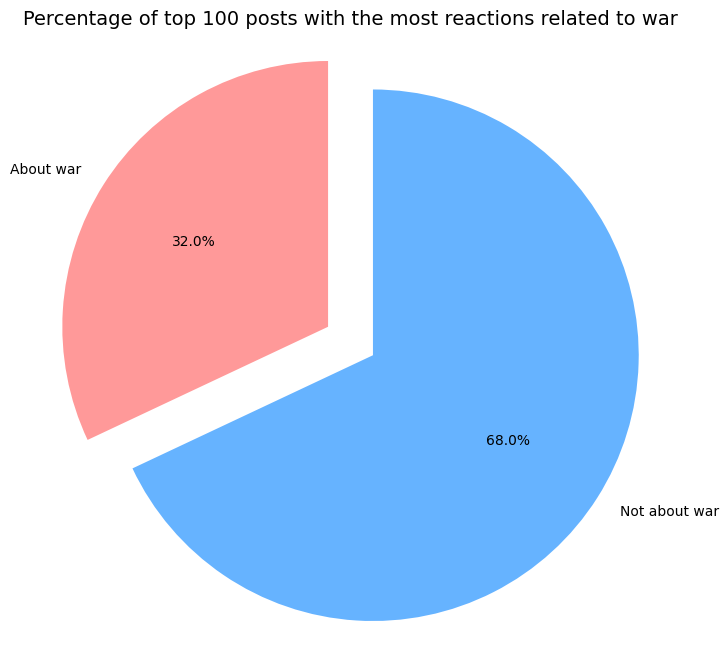

In [25]:
war_keywords = ['всу', 'вс', 'войн', 'сво', 'мобилиз', 'конфликт', 'боевы', 'вторж', 'зеленск', 'нато', 'отступ', 
                    'погиб', 'украин', 'окуп', 'агрес', 'армия', 'санкци', 'тревога', 'плен', 'жертв', 'танк', 'ракет', 
                    'авиа', 'разру', 'дрон', 'беспил', 'спецоперац', 'потер', 'фронт', 'тер', 'взрыв', 'вое', 'призыв', 
                    'вооруж', 'оруж', 'уничто']

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text

def is_war_related(text, keywords=war_keywords):
    text = clean_text(text)
    return any(re.search(rf'\b{keyword}', text) for keyword in keywords)

def war_percentage_in_top_100_reacted_messages(df, reactions_column='reactions', message_column='message'):
    df[reactions_column] = pd.to_numeric(df[reactions_column], errors='coerce')
    top_100_messages = df.nlargest(100, reactions_column)[[message_column, reactions_column]]
    top_100_messages['is_war_related'] = top_100_messages[message_column].apply(lambda x: is_war_related(str(x)))
    war_related_count = top_100_messages['is_war_related'].sum()
    total_count = len(top_100_messages)
    war_percentage = (war_related_count / total_count) * 100
    
    labels = ['About war', 'Not about war']
    sizes = [war_percentage, 100 - war_percentage]
    colors = ['#ff9999', '#66b3ff']
    explode = [0.2, 0] 
    
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
    plt.title("Percentage of top 100 posts with the most reactions related to war", fontsize=14)
    plt.axis('equal') 
    plt.show()

war_percentage_in_top_100_reacted_messages(df, reactions_column='reactions', message_column='message')

#### So, it turns out that out of the 100 posts that caused the most engagement (collected the most reactions), 32% were related to the topic of war

## 15. What are the dynamics of views for certain pairs keywords?

### 15.1. Dynamics of views for presidents of 2 countries

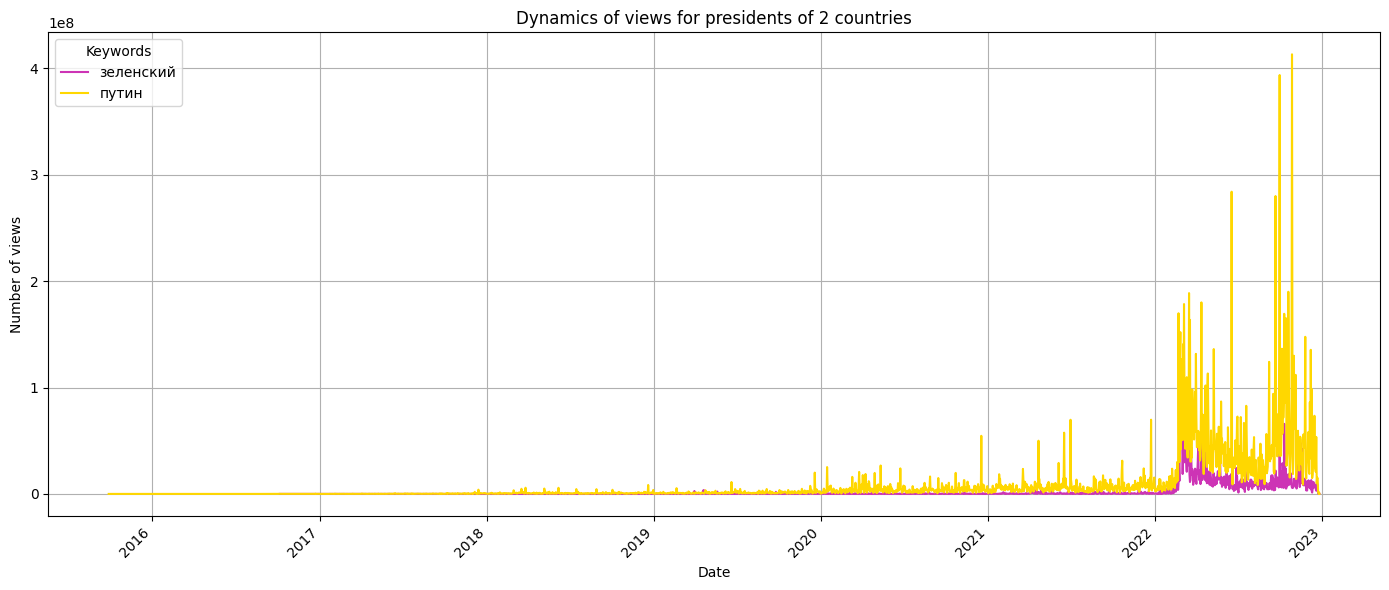

In [11]:
keywords = ['зеленский', 'путин']
colors = ['#cd34b5', '#ffd700']
df['date'] = pd.to_datetime(df['date'], errors='coerce')
keyword_views = {keyword: [] for keyword in keywords}
for keyword in keywords:
    keyword_messages = df[df['message'].str.contains(keyword, case=False, na=False)]

    daily_keyword_views = keyword_messages.groupby(keyword_messages['date'].dt.date)['views'].sum()

    keyword_views[keyword] = daily_keyword_views
plt.figure(figsize=(14, 6))

for i, (keyword, views) in enumerate(keyword_views.items()):
    plt.plot(views.index, views.values, label=keyword, c=colors[i])

plt.title('Dynamics of views for presidents of 2 countries')
plt.xlabel('Date')
plt.ylabel('Number of views')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Keywords")
plt.tight_layout()
plt.show()

### 15.2. Dynamics of views for two different countries

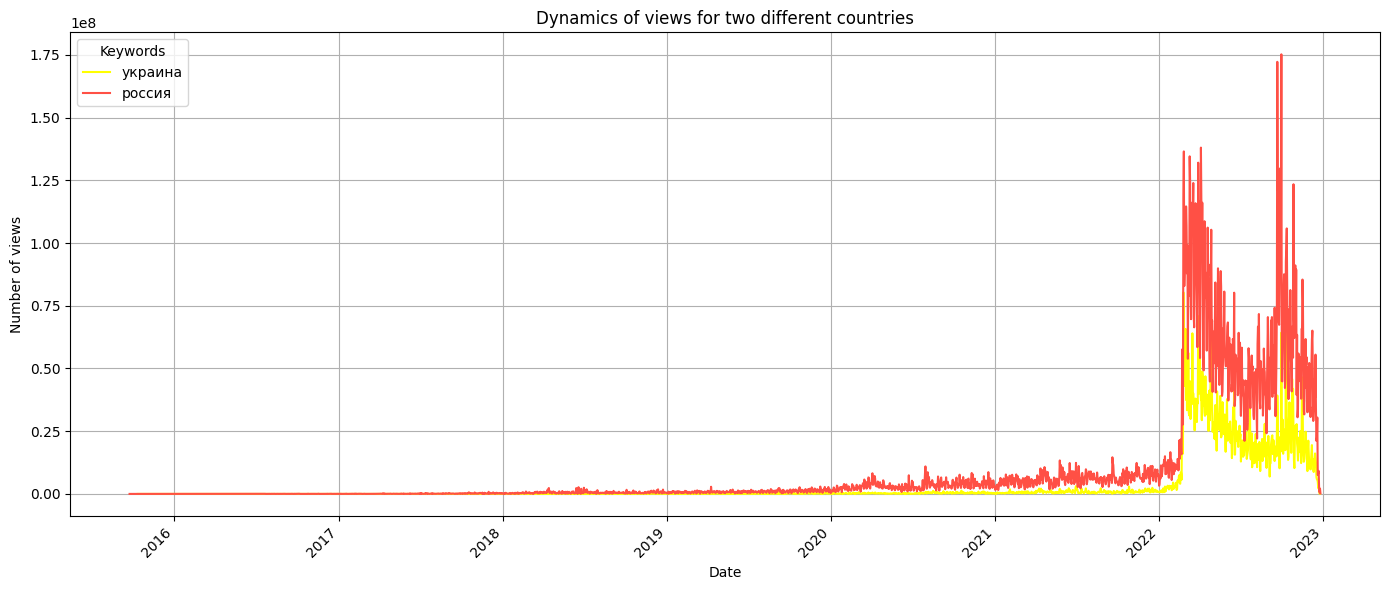

In [12]:
keywords = ['украина', 'россия']
colors = ['yellow', '#Ff5045']
df['date'] = pd.to_datetime(df['date'], errors='coerce')
keyword_views = {keyword: [] for keyword in keywords}
for keyword in keywords:
    keyword_messages = df[df['message'].str.contains(keyword, case=False, na=False)]

    daily_keyword_views = keyword_messages.groupby(keyword_messages['date'].dt.date)['views'].sum()

    keyword_views[keyword] = daily_keyword_views
plt.figure(figsize=(14, 6))

for i, (keyword, views) in enumerate(keyword_views.items()):
    plt.plot(views.index, views.values, label=keyword, c=colors[i])
plt.title('Dynamics of views for two different countries')
plt.xlabel('Date')
plt.ylabel('Number of views')
plt.grid(True)
plt.xticks(rotation=45, ha='right')

plt.legend(title="Keywords")

plt.tight_layout()
plt.show()

### 15.3. Dynamics of views for peace and war

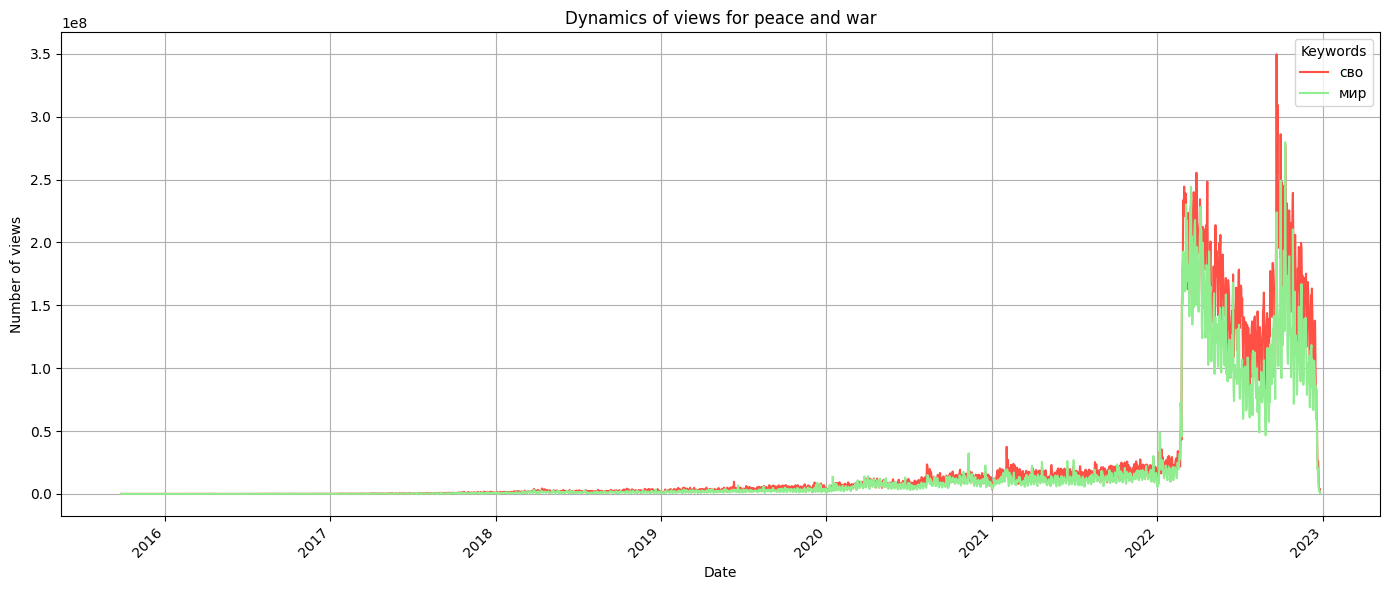

In [13]:
keywords = ['сво', 'мир']
colors = ['#Ff5045', 'lightgreen']
df['date'] = pd.to_datetime(df['date'], errors='coerce')
keyword_views = {keyword: [] for keyword in keywords}
for keyword in keywords:
    keyword_messages = df[df['message'].str.contains(keyword, case=False, na=False)]

    daily_keyword_views = keyword_messages.groupby(keyword_messages['date'].dt.date)['views'].sum()

    keyword_views[keyword] = daily_keyword_views
plt.figure(figsize=(14, 6))

for i, (keyword, views) in enumerate(keyword_views.items()):
    plt.plot(views.index, views.values, label=keyword, c=colors[i])
plt.title('Dynamics of views for peace and war')
plt.xlabel('Date')
plt.ylabel('Number of views')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Keywords")
plt.tight_layout()
plt.show()

## 16. What is the most popular sensitive topics

In [ ]:
sensitive_counts = df['sensitive-topic'].value_counts()
top_sensitive_counts = sensitive_counts[sensitive_counts.index != 'none'].head(10)
plt.figure(figsize=(10, 6))
top_sensitive_counts.plot(kind='bar', color='#Ff5045')
plt.title('Most popular Sensitive Topics')
plt.xlabel('Sensitive Topic')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.savefig('filtered_sensitive_topics.png', bbox_inches='tight')

## 17. What is the total number of videos released by russian propaganda channels in the last year?

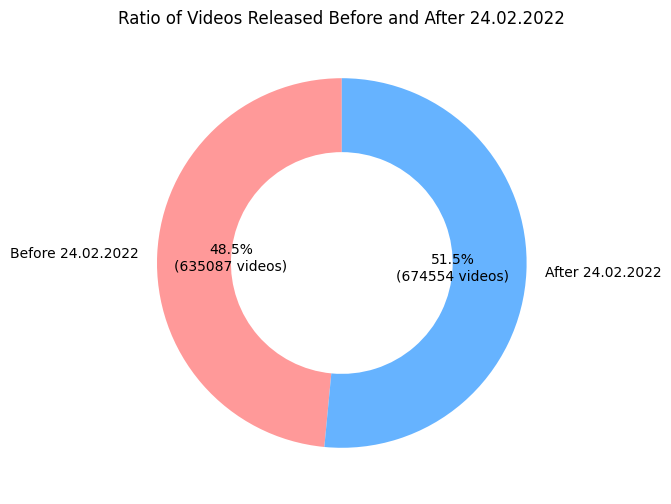

In [4]:
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.tz_localize(None)
df_videos = df[df['type'] == 'video']
cutoff_date = pd.to_datetime('2022-02-24').normalize()
before_cutoff = df_videos[df_videos['date'] < cutoff_date].shape[0]
after_cutoff = df_videos[df_videos['date'] >= cutoff_date].shape[0]

sizes = [before_cutoff, after_cutoff]
labels = ['Before 24.02.2022', 'After 24.02.2022']

def autopct_with_counts(pct, all_values):
    total = sum(all_values)
    absolute = int(round(pct * total / 100.0))
    return f"{pct:.1f}%\n({absolute} videos)"

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    sizes, 
    labels=labels, 
    autopct=lambda pct: autopct_with_counts(pct, sizes), 
    startangle=90, 
    colors=['#ff9999', '#66b3ff'], 
    wedgeprops=dict(width=0.4)
)

ax.set_title('Ratio of Videos Released Before and After 24.02.2022')
plt.show()

## 18. How did the start of the war in Ukraine affect the number of views?

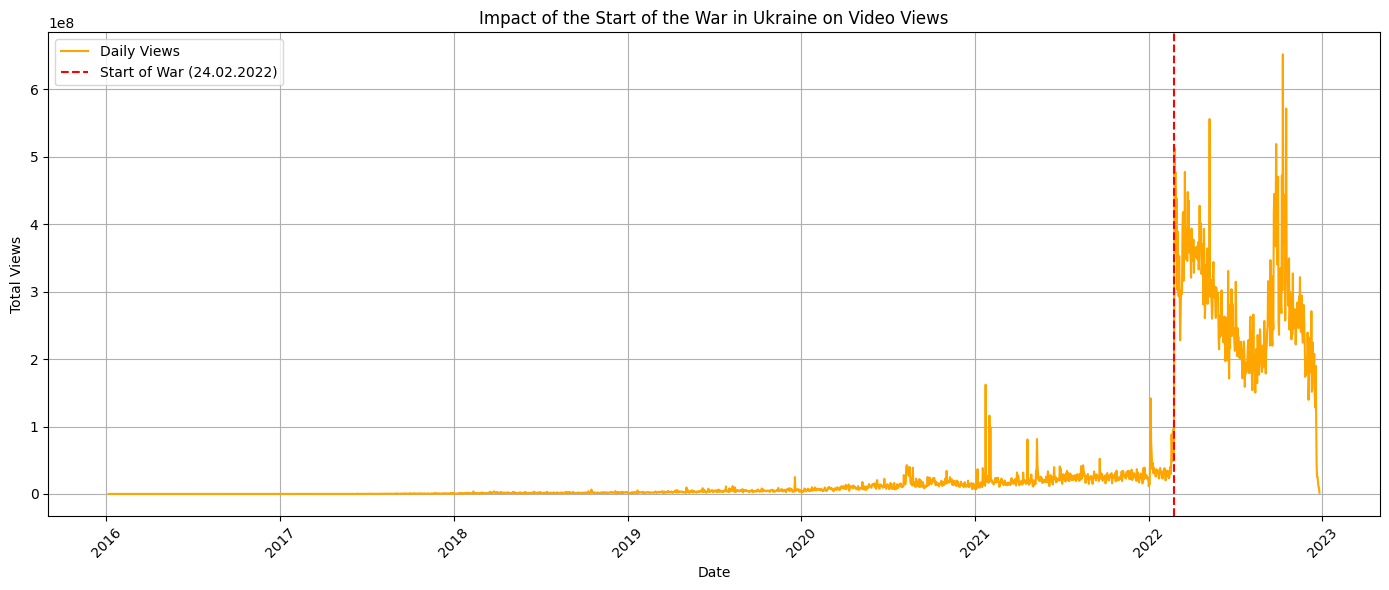

In [5]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df_videos = df[df['type'] == 'video']

daily_views = df_videos.groupby(df_videos['date'].dt.date)['views'].sum()

war_start_date = pd.to_datetime('2022-02-24').date()

plt.figure(figsize=(14, 6))
plt.plot(daily_views.index, daily_views.values, label='Daily Views', color='orange')

plt.axvline(x=war_start_date, color='red', linestyle='--', label='Start of War (24.02.2022)')

plt.title('Impact of the Start of the War in Ukraine on Video Views')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.grid(True)

plt.legend()

plt.tight_layout()
plt.show()

## 19. What is the distribution of video views across different days of the week?

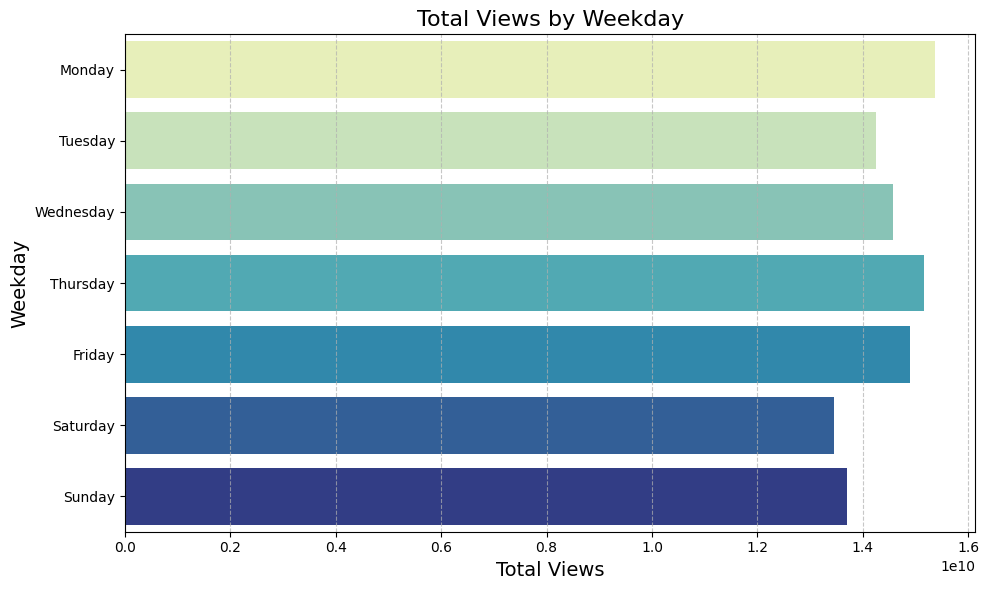

In [11]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df_videos = df[df['type'] == 'video'].copy()
df_videos['weekday'] = df_videos['date'].dt.day_name()

daily_views_by_weekday = df_videos.groupby('weekday')['views'].sum()
ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_views_by_weekday = daily_views_by_weekday.reindex(ordered_weekdays).reset_index()
daily_views_by_weekday.columns = ['Weekday', 'Total Views']

plt.figure(figsize=(10, 6))
sns.barplot(x="Total Views", y="Weekday", data=daily_views_by_weekday, palette="YlGnBu", hue="Weekday", dodge=False, legend=False)

plt.title('Total Views by Weekday', fontsize=16)
plt.xlabel('Total Views', fontsize=14)
plt.ylabel('Weekday', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 20.  What percentage of the posts have reactions?

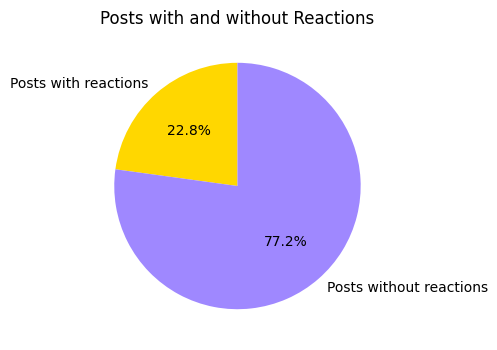

In [54]:
plt.figure(figsize=(4, 4))
has_reactions = (df['reactions_num'] > 0).sum()
no_reactions = (df['reactions_num'] == 0).sum()
plt.pie([has_reactions, no_reactions], labels=['Posts with reactions', 'Posts without reactions'], autopct='%1.1f%%', startangle=90, colors=['#ffd700', '#9F88FF'])
plt.title('Posts with and without Reactions')
plt.savefig('posts_with_reactions.png', bbox_inches='tight')
plt.show()

## 21. What type of messages do people respond best to?

### 21.1. What type of messages do people respond best to? (counting general amount of reaction for each content type)

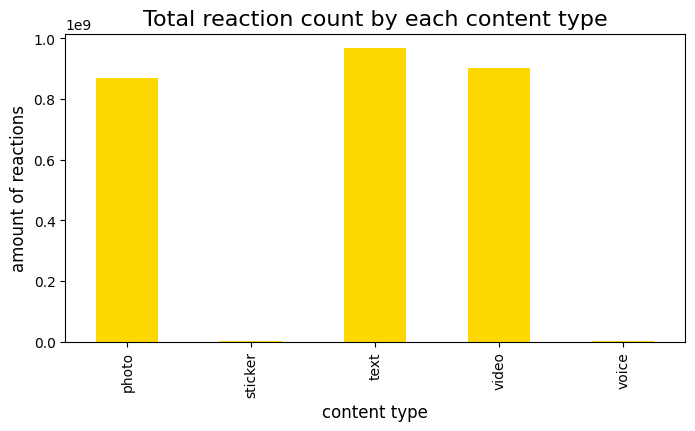

In [50]:
plt.figure(figsize=(8, 4))
df.groupby('type')['reactions_num'].sum().plot(kind='bar', color='#ffd700')
plt.title('Total reaction count by each content type', fontsize=16)
plt.xlabel('content type', fontsize=12)
plt.ylabel('amount of reactions', fontsize=12)
plt.show()

#### At first glance, it turns out that the text is evaluated best, but is it really so? 
#### According to the chart above, text messages are the most numerous, then it's fair to calculate the average number of reactions for each type of message

### 21.2. What type of messages do people respond best to? (counting average amount of reaction for each content type)

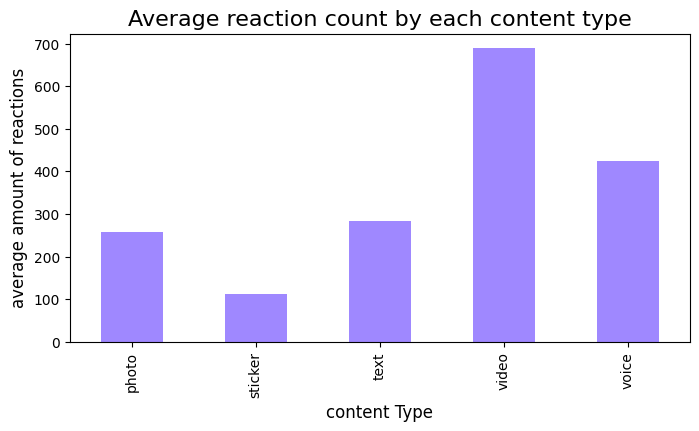

In [55]:
plt.figure(figsize=(8, 4))
df.groupby('type')['reactions_num'].mean().plot(kind='bar', color='#9F88FF')

# Add titles and labels
plt.title('Average reaction count by each content type', fontsize=16)
plt.xlabel('content Type', fontsize=12)
plt.ylabel('average amount of reactions', fontsize=12)
plt.show()

#### As a result, it turned out that the videos cause people to be more involved to leave a reaction

## 22. Correlation between views and reactions by Hours of the Day before start of war (only for posts which have >=1 reaction)

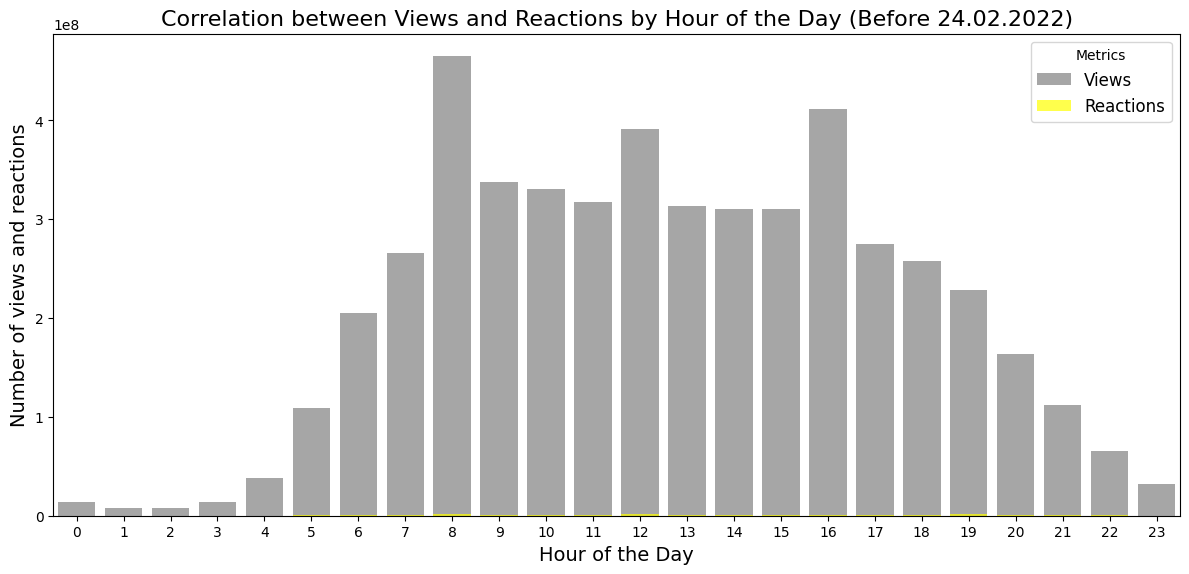

In [7]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['hour'] = df['date'].dt.hour
date_split = '2022-02-24 00:00:00'
df_before = df[df['date'] < date_split]
df_before_with_reactions = df_before[df_before['reactions_num'] > 0]

hourly_views_before = df_before_with_reactions.groupby('hour')['views'].sum()
hourly_reactions_before = df_before_with_reactions.groupby('hour')['reactions_num'].sum()
hourly_views_before = hourly_views_before.astype(float)
hourly_reactions_before = hourly_reactions_before.astype(float)

hours = np.arange(24)
bar_width = 0.4
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(hours, hourly_views_before, width=0.8, color='gray', label='Views', alpha=0.7)
ax.bar(hours, hourly_reactions_before, width=0.8, color='yellow', label='Reactions', alpha=0.7)
ax.set_xlabel('Hour of the Day', fontsize=14)
ax.set_ylabel('Number of views and reactions', fontsize=14)
ax.set_title('Correlation between Views and Reactions by Hour of the Day (Before 24.02.2022)', fontsize=16)
ax.set_xticks(hours)
ax.set_xlim(-0.5, 23.5)
ax.legend(title='Metrics', fontsize=12)
fig.tight_layout()
plt.show()

## 23. Correlation between views and reactions by Hours of the Day after start of war (only for posts which have >=1 reaction)

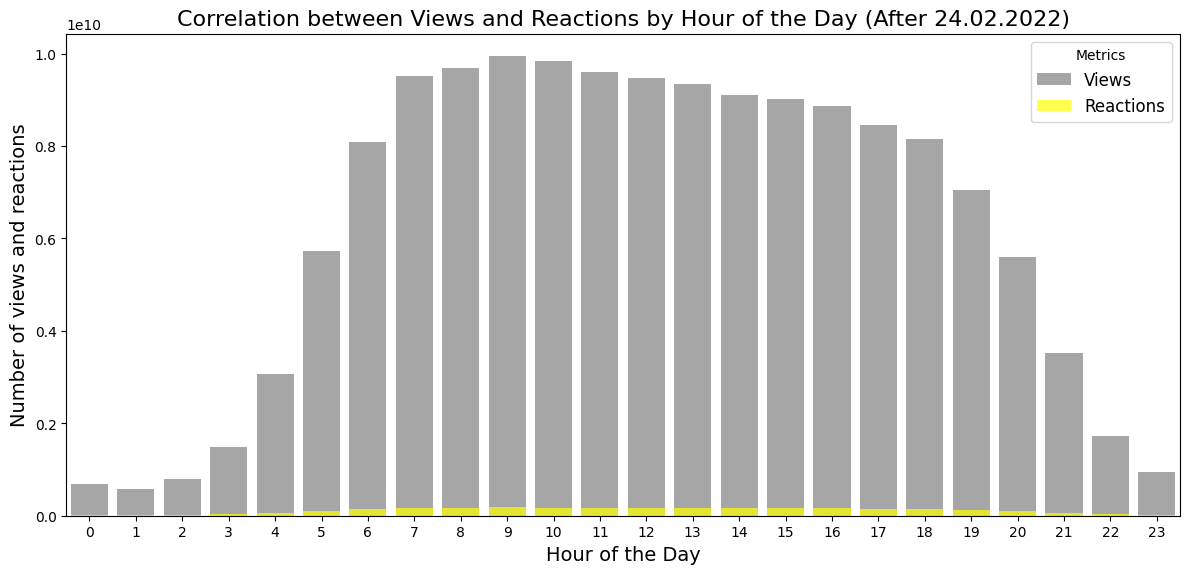

In [18]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['hour'] = df['date'].dt.hour
date_split = '2022-02-24 00:00:00'
df_after = df[df['date'] >= date_split]
df_after_with_reactions = df_after[df_after['reactions_num'] > 0]

hourly_views_after = df_after_with_reactions.groupby('hour')['views'].sum()
hourly_reactions_after = df_after_with_reactions.groupby('hour')['reactions_num'].sum()
hourly_views_after = hourly_views_after.astype(float)
hourly_reactions_after = hourly_reactions_after.astype(float)

hours = np.arange(24)
bar_width = 0.4
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(hours, hourly_views_after, width=0.8, color='gray', label='Views', alpha=0.7)
ax.bar(hours, hourly_reactions_after, width=0.8, color='yellow', label='Reactions', alpha=0.7)
ax.set_xlabel('Hour of the Day', fontsize=14)
ax.set_ylabel('Number of views and reactions', fontsize=14)
ax.set_title('Correlation between Views and Reactions by Hour of the Day (After 24.02.2022)', fontsize=16)
ax.set_xticks(hours)
ax.set_xlim(-0.5, 23.5)
ax.legend(title='Metrics', fontsize=12)
fig.tight_layout()
plt.show()

## 24. Find the month after the start of the war in which the most messages were published 

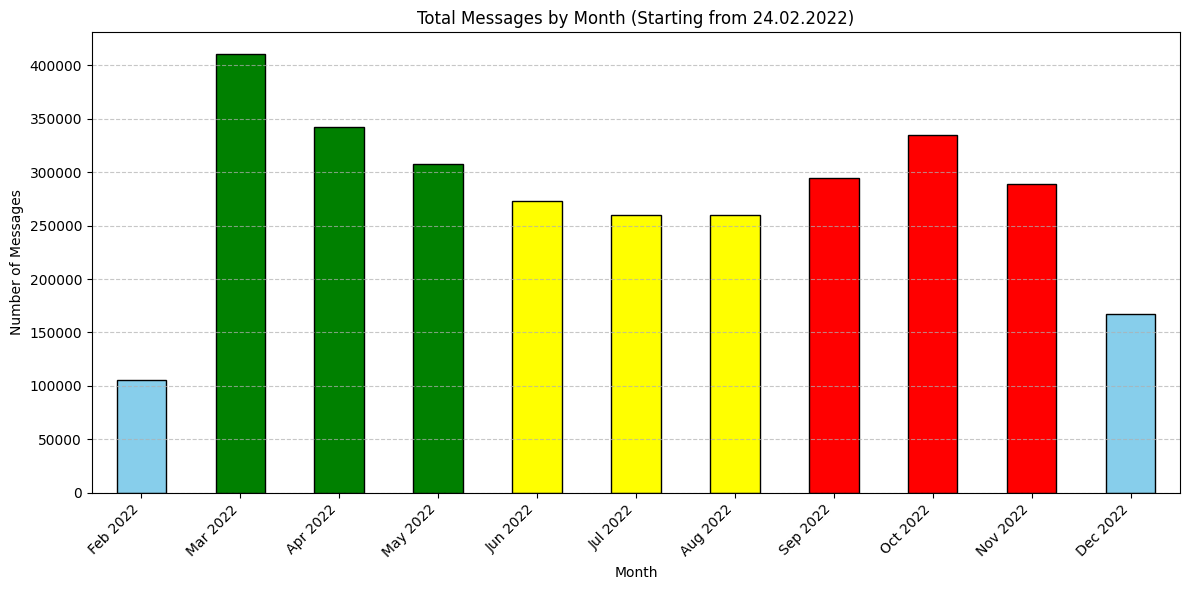

In [25]:
def plot_messages_by_month(df, date_column='date', start_date='2022-02-24'):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce').dt.tz_localize(None)
    start_date = pd.to_datetime(start_date)
    df = df[df[date_column] >= start_date].copy()
    df['year_month'] = df[date_column].dt.to_period('M')

    monthly_counts = df['year_month'].value_counts().sort_index()

    months = monthly_counts.index.to_timestamp()
    colors = []
    for month in months:
        if month.month in [3, 4, 5]:
            colors.append('green')
        elif month.month in [6, 7, 8]: 
            colors.append('yellow')
        elif month.month in [9, 10, 11]: 
            colors.append('red')
        else:  # Зима
            colors.append('skyblue')

    plt.figure(figsize=(12, 6))
    ax = monthly_counts.plot(kind='bar', color=colors, edgecolor='black')
    ax.set_title('Total Messages by Month (Starting from 24.02.2022)')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Messages')
    ax.set_xticks(range(len(monthly_counts)))
    ax.set_xticklabels(monthly_counts.index.strftime('%b %Y'), rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_messages_by_month(df, date_column='date')

## 25. Correlation between toxic and neutral messages by month. Comparing before and after war (starting from 2020)

<Figure size 1400x800 with 0 Axes>

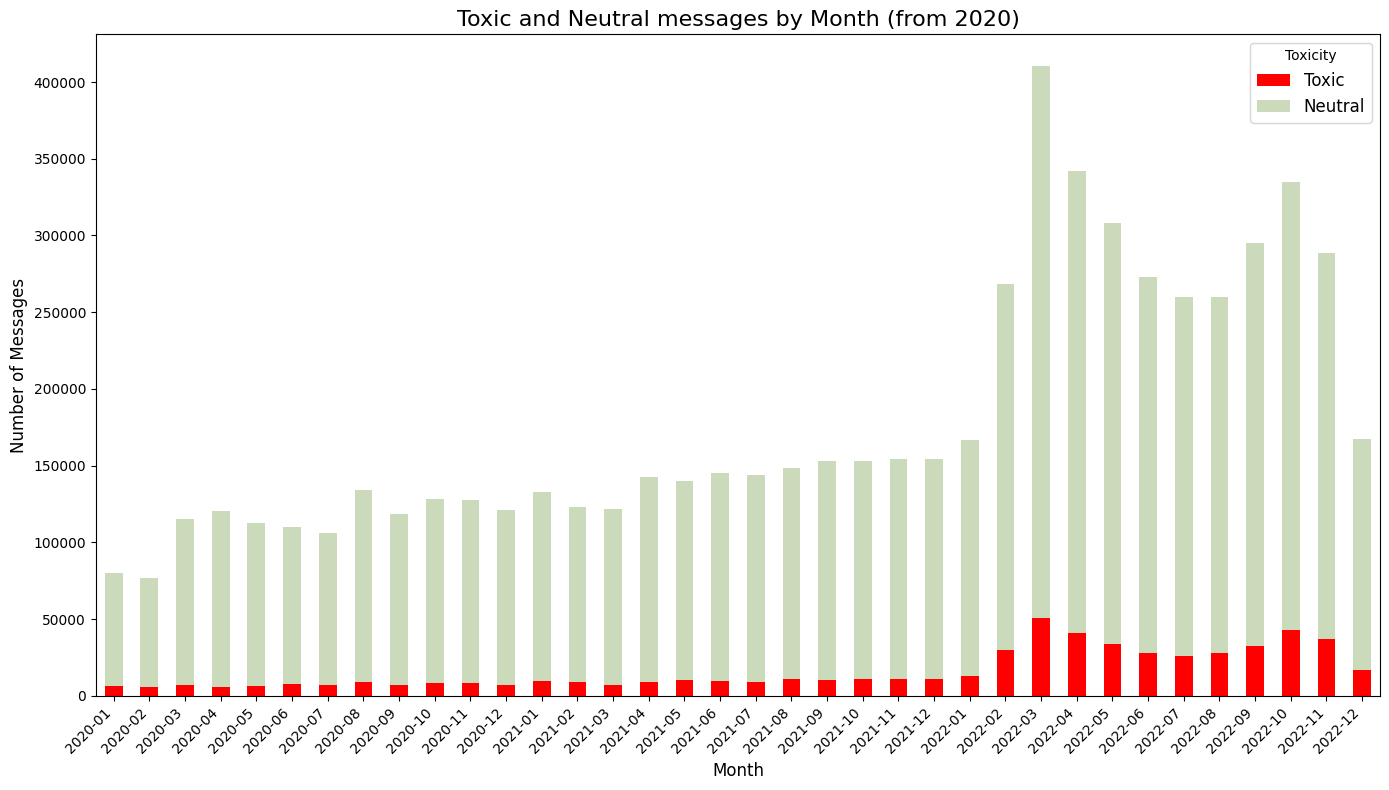

In [17]:
df_limited = df.copy()
df_limited['datetime'] = pd.to_datetime(df_limited['datetime'], errors='coerce').dt.tz_localize(None)
df_limited = df_limited.dropna(subset=['datetime', 'toxicity'])
df_limited = df_limited[df_limited['datetime'].dt.year >= 2020]

toxicity_mapping = {'toxic': -1, 'neutral': 0}
df_limited['toxicity_numeric'] = df_limited['toxicity'].map(toxicity_mapping)
df_limited['month'] = df_limited['datetime'].dt.to_period('M')
toxicity_counts = df_limited.groupby(['month', 'toxicity_numeric']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
toxicity_counts.plot(kind='bar', stacked=True, color=['red', '#CADABA'], figsize=(14, 8))
plt.title('Toxic and Neutral messages by Month (from 2020)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Messages', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(['Toxic', 'Neutral'], title='Toxicity', fontsize=12)
plt.tight_layout()
plt.show()

## 26. Correlation between views for toxic and neutral messages by month. Comparing before and after war (starting from 2020)

<Figure size 1400x800 with 0 Axes>

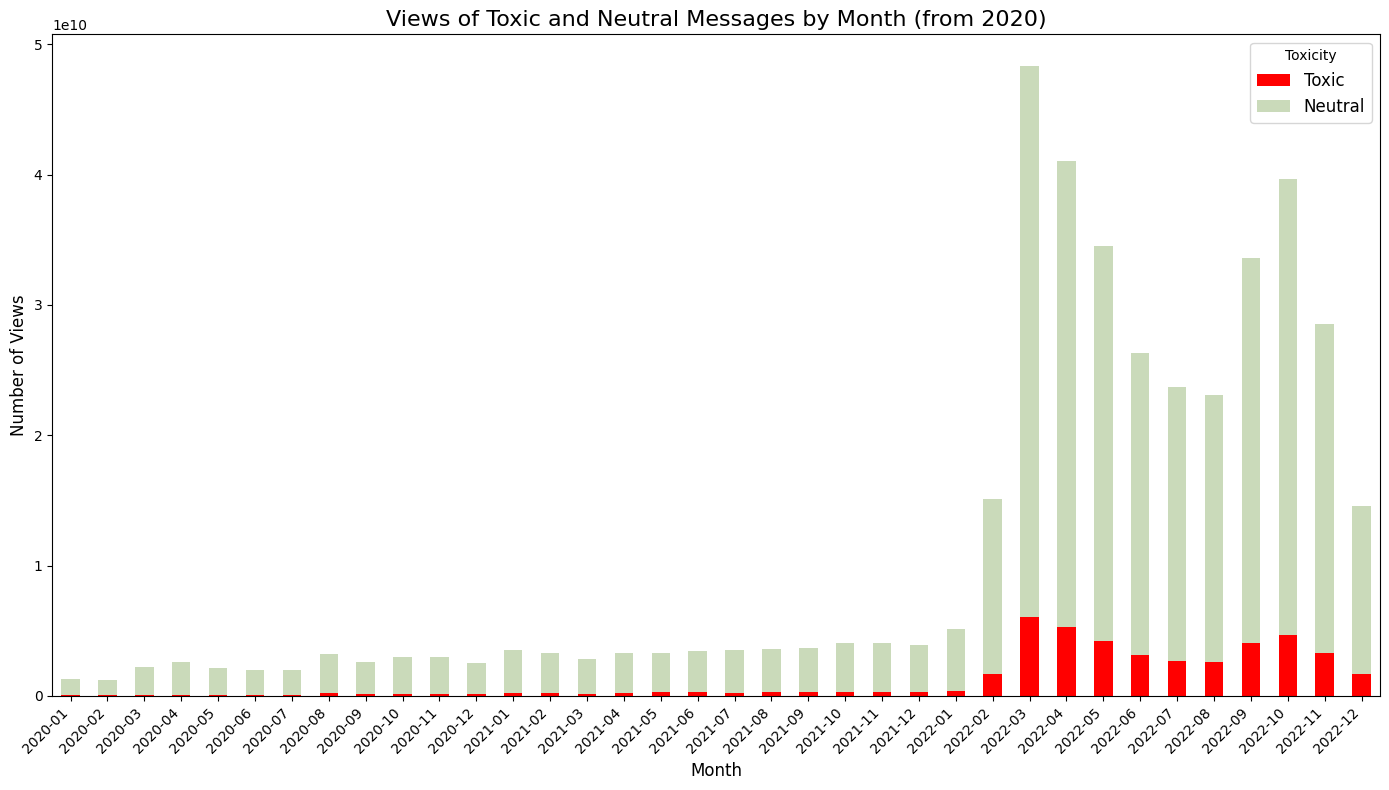

In [32]:
df_limited = df.copy()
df_limited['datetime'] = pd.to_datetime(df_limited['datetime'], errors='coerce').dt.tz_localize(None)
df_limited = df_limited.dropna(subset=['datetime', 'toxicity'])

df_limited = df_limited[df_limited['datetime'].dt.year >= 2020]
toxicity_mapping = {'toxic': -1, 'neutral': 0}
df_limited['toxicity_numeric'] = df_limited['toxicity'].map(toxicity_mapping)
df_limited['month'] = df_limited['datetime'].dt.to_period('M')
toxicity_counts = df_limited.groupby(['month', 'toxicity_numeric'])['views'].sum().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
toxicity_counts.plot(kind='bar', stacked=True, color=['red', '#CADABA'], figsize=(14, 8))
plt.title('Views of Toxic and Neutral Messages by Month (from 2020)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Views', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(['Toxic', 'Neutral'], title='Toxicity', fontsize=12)
plt.tight_layout()
plt.show()

## 27. 3D visualization of the dependence of the number of views on the neutrality of the messages over time in March before and after the war.

C:\Users\User\AppData\Local\Temp\ipykernel_14144\3810020760.py:48: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


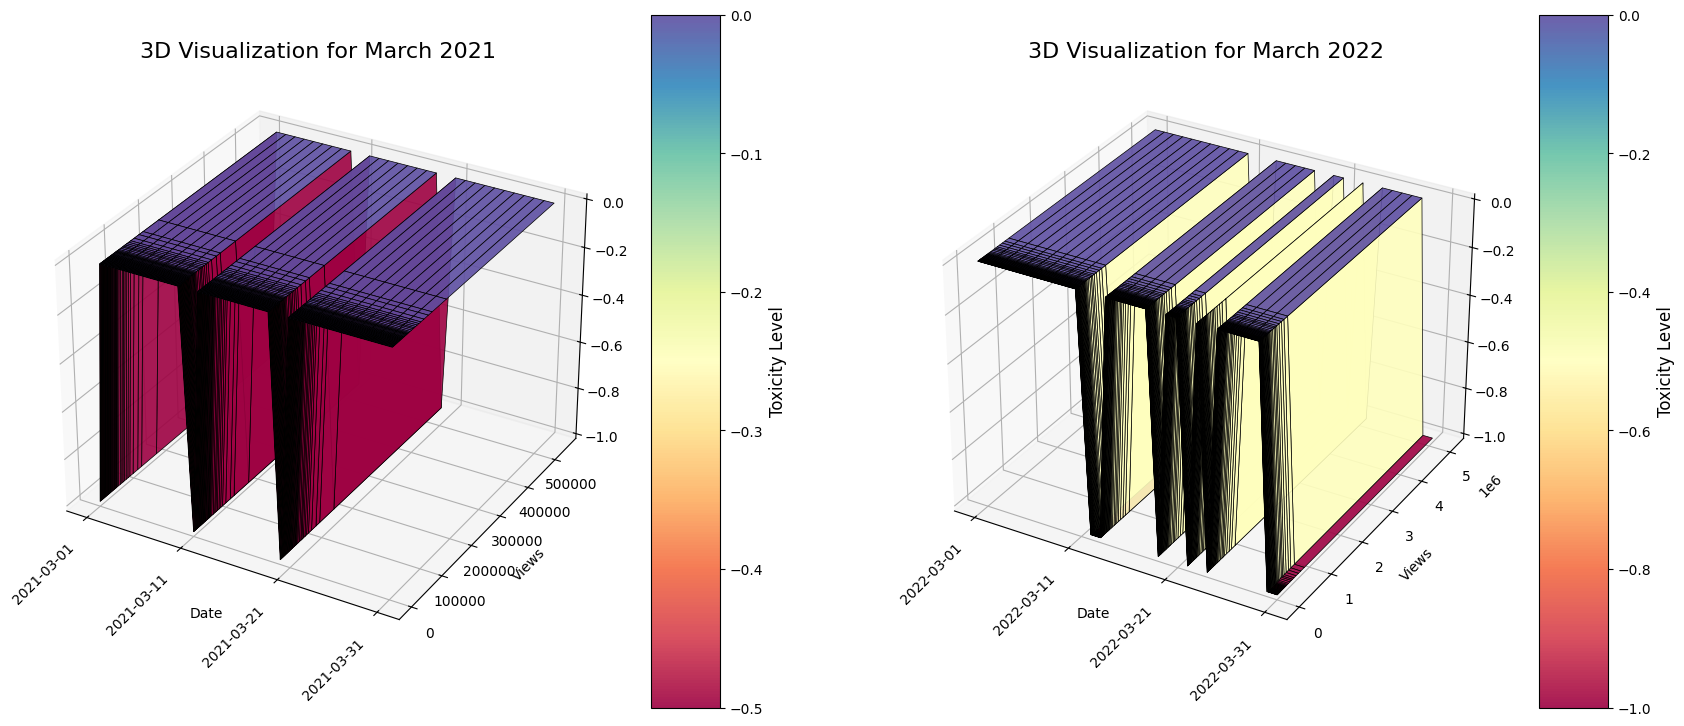

In [3]:
df_limited = df.copy()
df_limited['datetime'] = pd.to_datetime(df_limited['datetime'], errors='coerce').dt.tz_localize(None)

df_limited = df_limited.dropna(subset=['datetime', 'views', 'toxicity'])

toxicity_mapping = {'toxic': -1, 'neutral': 0}
df_limited['toxicity_numeric'] = df_limited['toxicity'].map(toxicity_mapping)

df_march_2021 = df_limited[(df_limited['datetime'].dt.month == 3) & (df_limited['datetime'].dt.year == 2021)]
df_march_2022 = df_limited[(df_limited['datetime'].dt.month == 3) & (df_limited['datetime'].dt.year == 2022)]

def plot_3d_graph(df_limited, title, ax):
    if df_limited.empty:
        print(f"Warning: No data available for {title}")
        return

    dates_numeric = (df_limited['datetime'] - df_limited['datetime'].min()).dt.days
    views = df_limited['views'].values
    toxicity = df_limited['toxicity_numeric'].values

    if len(dates_numeric) == 0 or len(views) == 0 or len(toxicity) == 0:
        print(f"Warning: Empty data for {title}")
        return
    X, Y = np.meshgrid(np.unique(dates_numeric), np.unique(views))
    if len(np.unique(dates_numeric)) == 0 or len(np.unique(views)) == 0:
        print(f"Warning: Not enough unique values for {title}")
        return
    sorted_dates_numeric = np.sort(dates_numeric)
    sorted_toxicity = toxicity[np.argsort(dates_numeric)]
    Z = np.interp(X.flatten(), sorted_dates_numeric, sorted_toxicity)
    Z = Z.reshape(X.shape)

    surf = ax.plot_surface(X, Y, Z, cmap="Spectral", edgecolor='k', linewidth=0.5, alpha=0.9)

    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Date', fontsize=10)
    ax.set_ylabel('Views', fontsize=10)
    cbar = fig.colorbar(surf, shrink=0.5, aspect=10)
    cbar.set_label("Toxicity Level", fontsize=12)
    xticks_dates = pd.to_datetime(np.unique(dates_numeric), origin=df_limited['datetime'].min(), unit='D')
    ax.set_xticks(np.unique(dates_numeric)[::10]) 
    ax.set_xticklabels([str(date)[:10] for date in xticks_dates[::10]], rotation=45, ha='right')
fig = plt.figure(figsize=(21, 18))
ax1 = fig.add_subplot(121, projection='3d')
plot_3d_graph(df_march_2021, '3D Visualization for March 2021', ax1)
ax2 = fig.add_subplot(122, projection='3d')
plot_3d_graph(df_march_2022, '3D Visualization for March 2022', ax2)
plt.tight_layout()
plt.show()

#### Finally, I became interested in how popular the topic of the coronavirus was in these channels and I decided to find out how the begining of the war in Ukraine affected the dynamics of topics about the coronavirus

## 28. How popular the topic of the coronavirus was in these channels after begining of pandemia and how the begining of the war in Ukraine affected the dynamics of topics about it.

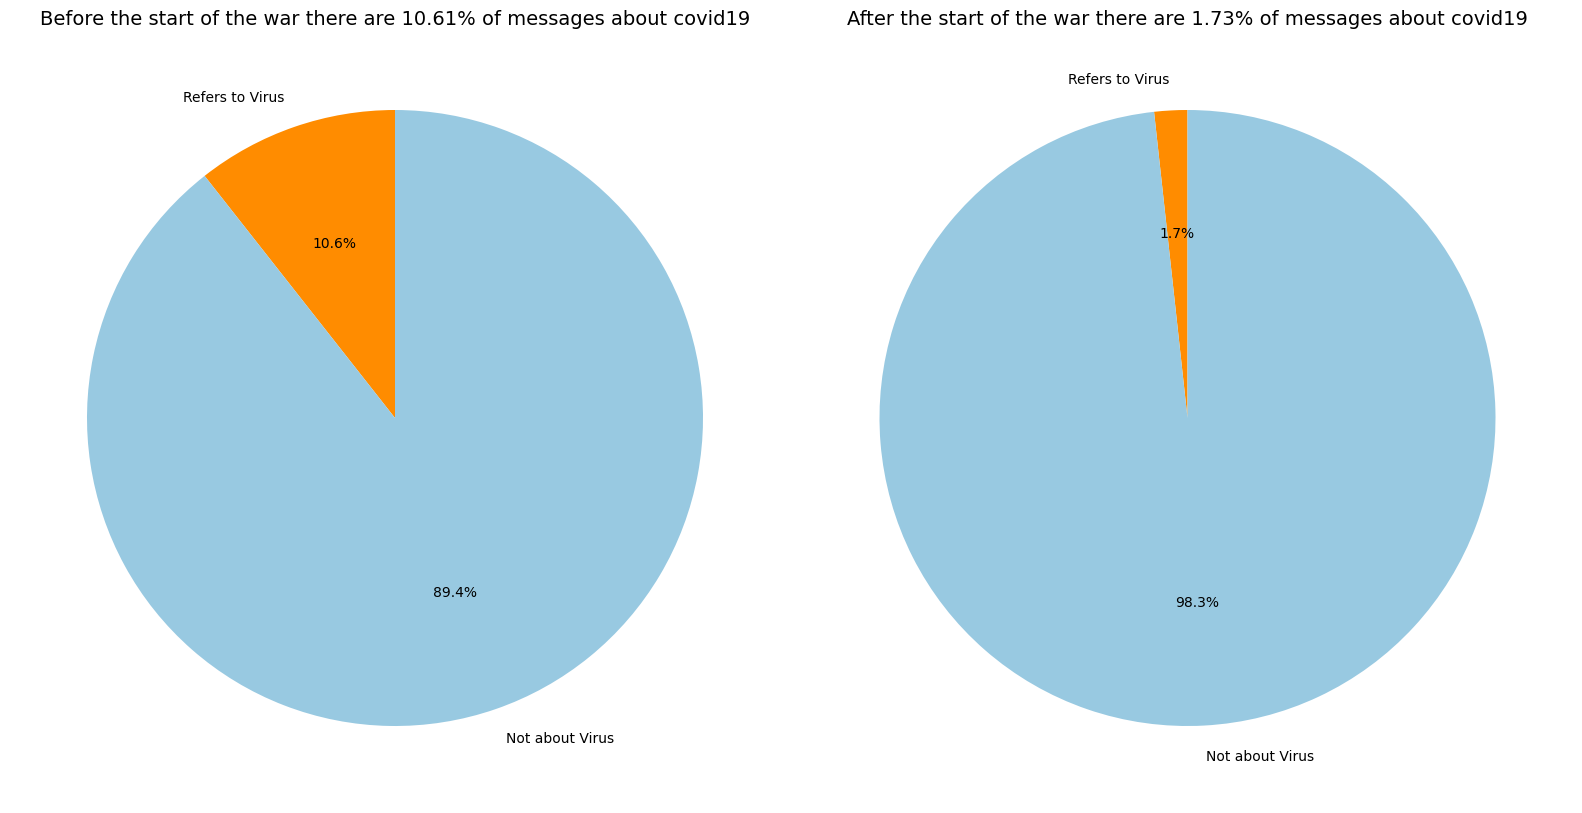

In [19]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower()) 
    return text

def is_virus_related(text, virus_keywords):
    text = clean_text(text)
    return any(re.search(rf'\b{keyword}', text) for keyword in virus_keywords)

def plot_virus_percentage_comparison(df, text_column='message', date_column='date'):
    virus_keywords = ['корон', 'ковид', 'инфициров', 'больн', 'вирус', 'заболе']
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce').dt.tz_localize(None)
    df_before_war = df[(df[date_column] >= pd.to_datetime('2019-11-17').tz_localize(None)) & 
                       (df[date_column] < pd.to_datetime('2022-02-24').tz_localize(None))].copy()
    df_after_war = df[df[date_column] >= pd.to_datetime('2022-02-24').tz_localize(None)].copy()

    def get_virus_percentage(df_filtered):
        df_filtered['is_virus_related'] = df_filtered[text_column].apply(
            lambda x: is_virus_related(str(x), virus_keywords) if pd.notnull(x) else False
        )
        virus_count = df_filtered['is_virus_related'].sum()
        total_count = len(df_filtered)
        return virus_count, total_count

    virus_count_before, total_count_before = get_virus_percentage(df_before_war)
    virus_count_after, total_count_after = get_virus_percentage(df_after_war)

    virus_percentage_before = (virus_count_before / total_count_before) * 100
    virus_percentage_after = (virus_count_after / total_count_after) * 100

    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    ax[0].pie([virus_count_before, total_count_before - virus_count_before],
              labels=['Refers to Virus', 'Not about Virus'],
              autopct='%1.1f%%', startangle=90, colors=['#ff8c00', '#98c9e1'])
    ax[0].set_title(f'Before the start of the war there are {virus_percentage_before:.2f}% of messages about covid19', fontsize=14)

    ax[1].pie([virus_count_after, total_count_after - virus_count_after],
              labels=['Refers to Virus', 'Not about Virus'],
              autopct='%1.1f%%', startangle=90, colors=['#ff8c00', '#98c9e1'])
    ax[1].set_title(f'After the start of the war there are {virus_percentage_after:.2f}% of messages about covid19', fontsize=14)
    plt.tight_layout()
    plt.show()

plot_virus_percentage_comparison(df, text_column='message', date_column='date')

#### The number of messages about coronavirus decreased by 6.25 times after the start of the war